# INN Hotels Project
###### Marks : 60

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [237]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Import Dataset

In [238]:
# Loading the dataset
INNhotels = pd.read_csv(
    r"C:\Users\igorm\OneDrive\Desktop\CAREER_DS_BIG DATA\UNIVERSITY OF TEXAS DS_BA\DATA FILES\INNHotelsGroup.csv"
)

<IPython.core.display.Javascript object>

In [239]:
# creating a copy of the original data to prevent issues after modifying it
data = INNhotels.copy()

<IPython.core.display.Javascript object>

### View the first and last 10 rows of the dataset

In [240]:
# Visualizing the first 10 rows of the dataset
data.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   
5                                     0           115.00000   
6                                     0           107.55000   
7                                     0           105.61000   
8                                     0            96.90000   
9                                     0           133.44000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

<IPython.core.display.Javascript object>

In [241]:
# Creating a random sample from the dataset to visualize it
data.sample(n=20, random_state=1)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   
15648   INN15649             2               0                     2   
6116    INN06117             2               0                     0   
7868    INN07869             2               0                     2   
24527   INN24528             2               0                     0   
24227   INN24228             2               0                     1   
17216   INN17217             2               0                     0   
31124   INN31125             1               0                     0   
9101    INN09102             1               0                     2   
9474    INN09475             2               0                     0   
12782   INN12783             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   
15648                  4       Meal Plan 1                           0   
6116                   1       Meal Plan 1                           0   
7868                   4       Meal Plan 1                           0   
24527                  3       Meal Plan 1                           0   
24227                  0       Meal Plan 1                           0   
17216                  1       Meal Plan 1                           0   
31124                  1       Meal Plan 1                           0   
9101                   1       Meal Plan 1                           0   
9474                   2       Meal Plan 2                           0   
12782                  3      Not Selected                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369         Room_Type 4         55          2018              9   
2055         Room_Type 1         53          2017             12   
10969        Room_Type 1        245          2018              7   
24881        Room_Type 2        231          2018              8   
28658        Room_Type 1         71          2018              5   
20853        Room_Type 1         66          2017             10   
8501         Room_Type 2         40          2018              1   
1942         Room_Type 1         63          2018              8   
15648        Room_Type 1        209          2018              7   
6116         Room_Type 1          9          2018              7   
7868         Room_Type 4        123          2018     

<IPython.core.display.Javascript object>

In [242]:
# Lets check the data information to validate the columns names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [243]:
# Validating the shape of the data
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [244]:
# checking for duplicate values
data.duplicated().value_counts()

False    36275
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* Having this approach and obtaining information about the dataset give us an idea about the strategy to identify and handle the missing values or any other issue within the dataset.
* The dataset has 19 and 36275 rows.
* There are a total of 36275 non-null observations in all the columns so we have not missing values.
* The columns of the dataset are as follow: "Booking_ID", "no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "lead_time", "arrival_year", "arrival_month", "arrival_date", "market_segment_type", "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "booking_status".
* The dataset contains 19 columns: 5 are object type('Booking_ID ', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type 'and 'booking_status'), 13 corresponds to a integer64 type ('no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests' ), and just 1 belongs to float64 type('avg_price_per_room').
* The total memory usage is approximately 5.3+ MB, which is low.
* We do not have duplicated values in our dataset.
* Having a look on the first 10 rows of the dataset, extracting a 20 rows random sample, and validating with all the sanity check codes, we do not see any relevant issue within our dataset.

**Let's drop the Booking_ID column first before we proceed forward**.

In [245]:
# Since the first column "Booking_ID" is just an id , we can remove it from the dataset.
data.drop(["Booking_ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [246]:
# Validating the extraction of the "Booking_ID" column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [247]:
# Preliminary Analysis of the categorical variables to observe the proportionally
cat_columns = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [248]:
# Checking the % percental weight of each category within the "type_of_meal_plan" variable
data["type_of_meal_plan"].value_counts("type_of_meal_plan")

Meal Plan 1    0.76733
Not Selected   0.14142
Meal Plan 2    0.09111
Meal Plan 3    0.00014
Name: type_of_meal_plan, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (type_of_meal_plan) corresponds to: Meal Plan 1, Not Selected, Meal Plan 2, Meal Plan 3.
* "Meal Plan 1" (27835) category represents the 76.7% of the variable, "Not Selected" (5130) represents the 14.1%, "Meal Plan 2"(3305) 9.1%, and "Meal Plan" 3(5) 0.1%.
* We are going to show and analyze the graphs later on.

In [249]:
# Checking the % percental weight of each category within the "room_type_reserved" variable
data["room_type_reserved"].value_counts("room_type_reserved")

Room_Type 1   0.77547
Room_Type 4   0.16697
Room_Type 6   0.02663
Room_Type 2   0.01908
Room_Type 5   0.00731
Room_Type 7   0.00436
Room_Type 3   0.00019
Name: room_type_reserved, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (room_type_reserved) corresponds to: Room_Type 1, Room_Type 2, Room_Type 3, Room_Type 4, Room_Type 5, Room_Type 6, Room_Type 7.
* "Room_Type 1" (28130) category represents the 77.5% of the variable, "Room_Type 4" (6057) represents the 16.6%, "Room_Type 6(966) 2.6%, and "Room_Type 2"(692) 1.9%, "Room_Type 5" (265) 0.7%, "Room_Type 7" (158) 0.4%, and "Room_Type 3" (7) represents 0.01.
* We are going to show and analyze the graphs later on.

In [250]:
# Checking the % percental weight of each category within the "market_segment_type" variable
data["market_segment_type"].value_counts("market_segment_type")

Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: market_segment_type, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (market_segment_type) corresponds to: Online, Offline, Room_Type 3, Corporate, Complementary, Room_Type 6, Aviation.
* "Online" (23214) category represents the 63.9% of the variable, "Offline" (10528) represents the 29%, "Corporate" (2017) 5.5%, and "Complementary"(391) 1%, and "Aviation" (125) 0.03%.
* We are going to show and analyze the graphs later on.

In [251]:
# Checking the % percental weight of each category within the "booking_status" variable
data["booking_status"].value_counts("booking_status")

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The categories in this variable (booking_status) corresponds to: Not_Canceled and Canceled.
* "Not_Canceled" (24390) category represents the 67.2% of the variable while "Canceled" (11885) represents the 32.7%.
* We are going to show and analyze the graphs later on.

## Exploratory Data Analysis

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

# Exploring the statistical values of the numerical variables
data.describe().T

#### Observations:
* Lets have a look on the statistical values of the variables considered critical within the entire process of the consumer decision journey.
  * no_of_adults: the mean is 1.84, the values are between 0 and 4 in this dataset with a standard deviation of 0.51. The 75% of the data is over 2 meanwhile the 25% of the data is over 2 (validate quartiles with graphs).
  * no_of_children: the mean is 0.10, the values are between 0 and 10 in this dataset with a standard deviation of 0.40. The 75% of the data is over 0 meanwhile the 25% of the data is over 0 (validate quartiles with graphs).
  * no_of_weekend_nights: the mean is 0.81 , the values are between 0 and 7 in this dataset with a standard deviation of 0.87. The 75% of the data is over 0 meanwhile the 25% of the data is over 2. The 25% and 75% quantiles are very close from each other.
  * no_of_week_nights: the mean is 2.20, the values are between 0 and 3 in this dataset with a standard deviation of 1.41. The 75% of the data is over 0 meanwhile the 25% of the data is over 3.
  * required_car_parking_space: Binary variable 0 = No / 1 = Yes.
  * lead_time: the mean is 85.23, the values are between 0 and 443 in this dataset with a standard deviation of 85.23. The 75% of the data is over 17 meanwhile the 25% of the data is over 126.
  * arrival_year: Timeline.
  * arrival_month: Timeline.
  * arrival_date: Timeline
  * no_of_previous_cancellations: min value 0 mas value 13.
  * no_of_previous_bookings_not_canceled: min value 0 mas value 58.
  * avg_price_per_room: the mean is 103.42€, the values are between 0 and 540€ in this sample with a standard deviation of 35.08€. The 75% of the data is over 0€ meanwhile the 25% of the data is over 120€.
  * no_of_special_requests: min value 0 mas value 5.

### Univariate Analysis

In [253]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### lead time

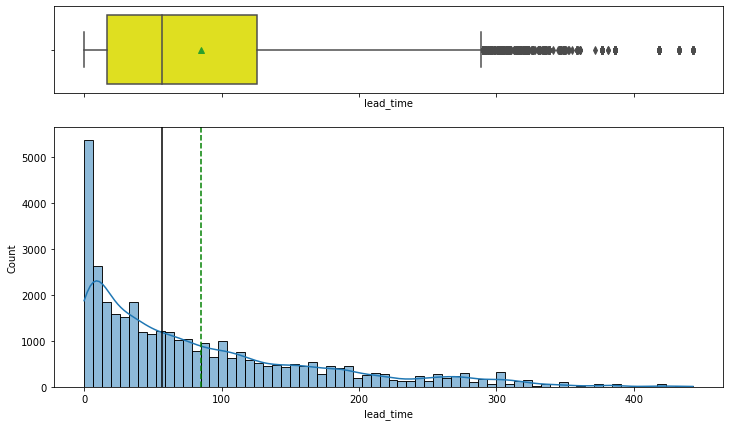

<IPython.core.display.Javascript object>

In [254]:
histogram_boxplot(data, "lead_time", kde=True)

In [255]:
data["lead_time"].median()

57.0

<IPython.core.display.Javascript object>

In [256]:
data[data["lead_time"] == 0].value_counts().sum()

1297

<IPython.core.display.Javascript object>

In [257]:
data_canceled = data[data["booking_status"] != "Not_Canceled"].copy()
data_canceled.head(30)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
2               1               0                     2                  1   
3               2               0                     0                  2   
4               2               0                     1                  1   
5               2               0                     0                  2   
12              2               0                     2                  1   
13              1               0                     2                  0   
15              2               0                     0                  2   
18              2               0                     2                  2   
20              2               0                     2                  2   
27              1               0                     0                  2   
28              1               0                     1                  2   
36              1               0                     2                  1   
38              2               0                     2                  3   
39              2               0                     2                  1   
43              2               0                     1                  1   
51              2               0                     2                  2   
58              2               0                     1                  4   
67              2               0                     0                  2   
73              2               0                     0                  2   
78              3               0                     2                  5   
80              2               2                     0                  2   
81              2               0                     0                  5   
87              1               0                     0                  2   
94              2               0                     2                  5   
96              2               0                     0                  2   
110             2               0                     0                  2   
114             2               2                     2                  2   
116             3               0                     2                  5   
118             2               0                     0                  1   
120             2               0                     0                  3   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
2         Meal Plan 1                           0        Room_Type 1   
3         Meal Plan 1                           0        Room_Type 1   
4        Not Selected                           0        Room_Type 1   
5         Meal Plan 2                           0        Room_Type 1   
12       Not Selected                           0        Room_Type 1   
13        Meal Plan 1                           0        Room_Type 1   
15        Meal Plan 2                           0        Room_Type 1   
18        Meal Plan 1                           0        Room_Type 1   
20        Meal Plan 1                           0        Room_Type 1   
27        Meal Plan 1                           0        Room_Type 4   
28        Meal Plan 1                           0        Room_Type 1   
36        Meal Plan 1                           0        Room_Type 1   
38       Not Selected                           0        Room_Type 1   
39        Meal Plan 1                           0        Room_Type 4   
43       Not Selected                           0        Room_Type 1   
51        Meal Plan 2                           0        Room_Type 1   
58        Meal Plan 1                           0        Room_Type 4   
67        Meal Plan 1                           0        Room_Type 4   
73        Meal Plan 1                           0        Room_Type 1   
78        Meal Plan 1                           0        Room_Type 4   
80        Meal Plan 1                           0        Room_Type 6   
81

<IPython.core.display.Javascript object>

In [258]:
data.groupby(["lead_time", "booking_status"])["avg_price_per_room"].mean().sort_values(
    ascending=True
).head(30)

lead_time  booking_status
311        Not_Canceled      9.00000
289        Canceled         35.27500
335        Canceled         45.00000
315        Not_Canceled     52.00000
322        Not_Canceled     52.00000
253        Not_Canceled     54.37500
304        Not_Canceled     59.07000
263        Not_Canceled     61.87500
236        Not_Canceled     61.98333
348        Not_Canceled     62.64000
182        Not_Canceled     63.06600
308        Canceled         63.74081
288        Canceled         64.18000
274        Not_Canceled     64.33333
443        Canceled         64.54545
309        Not_Canceled     65.00000
289        Not_Canceled     67.00000
300        Not_Canceled     67.50000
270        Canceled         67.63846
281        Not_Canceled     68.07000
224        Not_Canceled     68.16571
252        Not_Canceled     68.46750
433        Canceled         70.00000
302        Not_Canceled     70.10000
341        Canceled         71.91000
271        Not_Canceled     72.04545
359        N

<IPython.core.display.Javascript object>

In [259]:
# Calculating the 25th quantile & 75th quantile for the variable "lead_time"
Q1 = data["lead_time"].quantile(0.25)
Q3 = data["lead_time"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
print("Q1 =", Q1)
print("Q3 =", Q3)
print("Upper Whisker =", Upper_Whisker)


Q1 = 17.0
Q3 = 126.0
Upper Whisker = 289.5


<IPython.core.display.Javascript object>

#### Observations:
* We can observe a positive(+) skewness so quickly we can infer that "mean > median > mode" as the previous result show. The kurtosis seems to be normal or mesokurtic.
* There are some outliers where the lead time is greater than the upper whisker at 290 days
* The mode of lead time (Number of days between the date of booking and the arrival date) is 0 and we have 1297 samples this value so it would be interesting to evaluate its relationship with the booking_status variable later on.

### average price per room

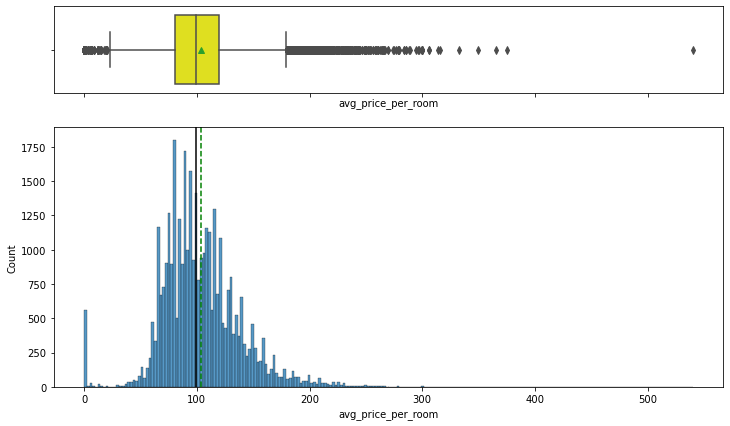

<IPython.core.display.Javascript object>

In [260]:
# creating an histogram_boxplot for the variable average price per room
histogram_boxplot(
    data, "avg_price_per_room"
)  

In [261]:
print(round(data["avg_price_per_room"].mean(), 2))
print(round(data["avg_price_per_room"].median(), 2))
print(round(data["avg_price_per_room"].mode(), 2))

103.42
99.45
0   65.00000
dtype: float64


<IPython.core.display.Javascript object>

In [262]:
data[data["avg_price_per_room"] == 0].value_counts().sum()

545

<IPython.core.display.Javascript object>

In [263]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [264]:
# Calculating the 25th quantile & 75th quantile for the variable "avg_price_per_room"
Q1 = data["avg_price_per_room"].quantile(0.25)
Q3 = data["avg_price_per_room"].quantile(0.75)
# Calculating IQR
IQR = Q3 - Q1
# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Lower_Whisker = Q1 - 1.5 * IQR
# Lets stablish the upper whisker as cutoff for the outliers
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker
print("Q1 =", Q1)
print("Q3 =", Q3)
print("Upper Whisker =", Upper_Whisker)
print("Lower Whisker =", Lower_Whisker)

Q1 = 80.3
Q3 = 120.0
Upper Whisker = 179.55
Lower Whisker = 20.749999999999993


<IPython.core.display.Javascript object>

#### Observations:
* The mode is 65€
* The mean is 103.41€, Std 35.08€. 1st quantile 80.3€ and 3rd quantile 120€.
* We can observe a positive(+) skewness so quickly we can infer that "mean > median > mode" as the previous result show. The kurtosis seems to be (+) positive or Leptokurtic.
* We can observe some outliers where the avg_price_per_room is under the lower whisker (20.74€) and greater than the upper whisker (179.55€).
* There are 545 samples with average price per room equal to zero so we should check later on the relationship with the booiking status and the kind of the reservation.

### Number of previous booking cancellations

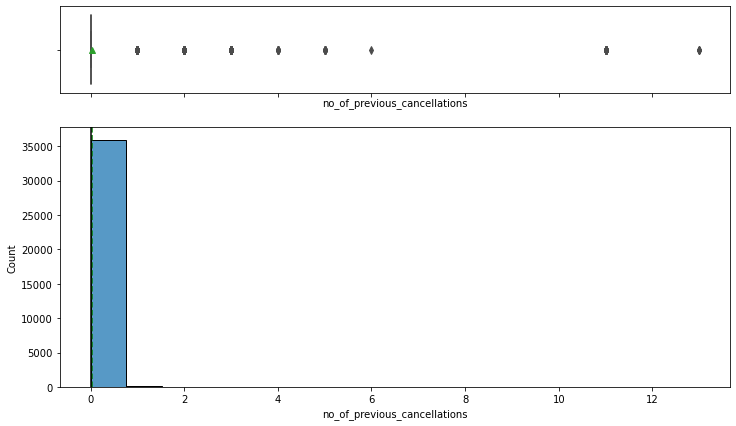

<IPython.core.display.Javascript object>

In [265]:
# Creating an histogram_boxplot for the variable number of previous booking cancellations
histogram_boxplot(
    data, "no_of_previous_cancellations"
)  

In [266]:
data[data["no_of_previous_cancellations"] == 0].value_counts().sum()

35937

<IPython.core.display.Javascript object>

#### Observations:
* The mode is 0.
* 35937 samples out 36275 belongs to zero no_of_previous_cancellations.
* Some outliers are observed.

### number of previous booking not canceled

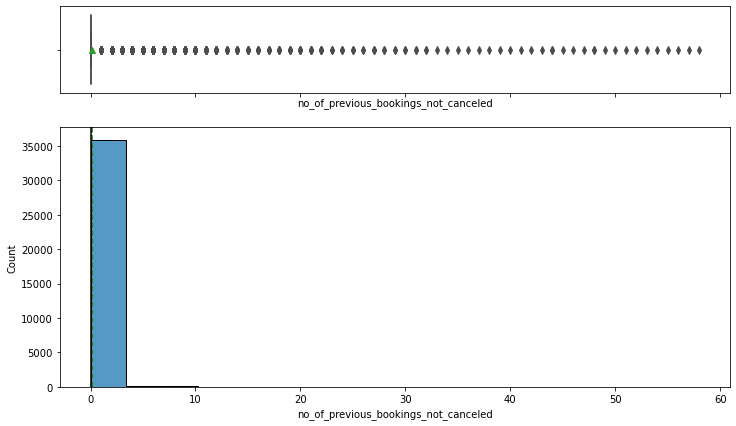

<IPython.core.display.Javascript object>

In [267]:
# Creating an histogram_boxplot for the variable number of previous booking not canceled
histogram_boxplot(
    data, "no_of_previous_bookings_not_canceled"
)  

In [268]:
data[data["no_of_previous_bookings_not_canceled"] == 0].value_counts().sum()

35463

<IPython.core.display.Javascript object>

#### Observations:
* The mode is 0.
* 35463 samples out 36275 belongs to zero no_of_previous_bookings_not_canceled.
* There are som outliers.

In [269]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="gist_ncar",
        order=data[feature].value_counts().index[:n].sort_values(ascending=True),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=16,
            xytext=(1, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [272]:
# We have to stablish the numerical binary code for bookings. 1 for "Canceled" and 0 for "Not_Canceled"
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

<IPython.core.display.Javascript object>

### number of adults

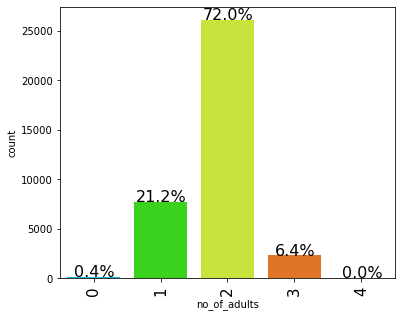

<IPython.core.display.Javascript object>

In [273]:
labeled_barplot(data, "no_of_adults", perc=True)

In [274]:
# Checking the total of samples including 2 adults
data[data["no_of_adults"] == 2].value_counts().sum()

26108

<IPython.core.display.Javascript object>

In [275]:
# Validating the number of samples including 2 adults and additionally were Canceled
data[(data["no_of_adults"] == 2) & (data["booking_status"] == 1)].value_counts().sum()

9119

<IPython.core.display.Javascript object>

In [276]:
# Validating the number of samples including 2 adults and additionally were Not anceled
data[(data["no_of_adults"] == 2) & (data["booking_status"] == 0)].value_counts().sum()

16989

<IPython.core.display.Javascript object>

#### Observations:
* The 72% of the samples include 2 adults, 21.2% just 1 adult, the 6.4% include 3 adults, and the lowest percentage correspinds to the samples with 0 adults with 0.4%.
* 9119 samples out 26108 belongs to the samples that includes 2 adults in the reservation and were Canceled, representing the 34.92% of the total samples with 2 adults.
* 16989 samples out 26108 belongs to the samples that includes 2 adults in the reservation and were Not Canceled, representing the 65% of the total samples with 2 adults.

### number of children

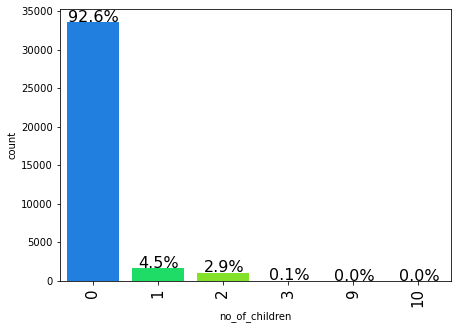

<IPython.core.display.Javascript object>

In [277]:
# Creating a labeled_barplot for the variable "number_of_children"
labeled_barplot(data, "no_of_children", perc=True)

In [278]:
# lets replace the values 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

<IPython.core.display.Javascript object>

In [279]:
data[data["no_of_children"] == 0].value_counts().sum()

33577

<IPython.core.display.Javascript object>

In [280]:
# Validating the number of samples including 0 children and additionally were Canceled
data[(data["no_of_children"] == 0) & (data["booking_status"] == 1)].value_counts().sum()

10882

<IPython.core.display.Javascript object>

In [281]:
# Validating the number of samples including 0 children and additionally were Not Canceled
data[(data["no_of_children"] == 0) & (data["booking_status"] == 0)].value_counts().sum()

22695

<IPython.core.display.Javascript object>

In [282]:
# Relationship between the variables "no_of_children" & "booking_status" with "avg_price_per_room"
data.groupby(["no_of_children", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

no_of_children  booking_status
0               0                 97.33139
                1                106.76410
3               0                114.03437
1               0                118.99073
                1                128.98343
2               0                163.55180
                1                177.62495
3               1                228.11667
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The 92% (33577 out 36275) of the samples include 0 children, 4.5% just 1, the 2.9% include 2 children, and the lowest percentage corresponds to the samples with 3 children with 0.1%.
* 10882 samples out 33577 belongs to the samples that includes 0 children in the reservation and were Canceled, representing the 32.40% of the total samples with 0 children.
* 22695 samples out 33577 belongs to the samples that includes 0 children in the reservation and were Not Canceled, representing the 67.5% of the total samples with 0 children.
* The cheapest bookings belongs to 0 children category both for Not Canceled and Canceled with 97.33€ and 106.76€ respectively.
* The most expensive bookings belongs to the 3 children category, as logic would suggest, especifically to the Canceled samples with 228.11€.

### number of week nights

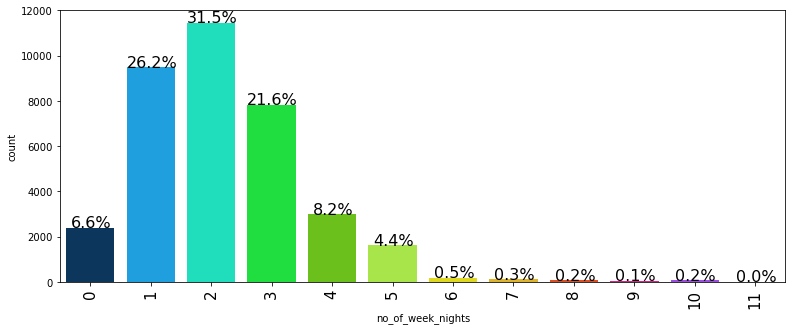

<IPython.core.display.Javascript object>

In [283]:
# Creating a labeled_barplot for the variable "no_of_week_nights"
labeled_barplot(data, "no_of_week_nights", perc=True, n=12)

In [284]:
# Checking the total of samples including 2 no of week nights
print(
    "Number of samples with 2 week nights =",
    data[data["no_of_week_nights"] == 2].value_counts().sum(),
)
print(
    "Number of samples with 1 week nights =",
    data[data["no_of_week_nights"] == 1].value_counts().sum(),
)
print(
    "Number of samples with 3 week nights =",
    data[data["no_of_week_nights"] == 3].value_counts().sum(),
)

Number of samples with 2 week nights = 11444
Number of samples with 1 week nights = 9488
Number of samples with 3 week nights = 7839


<IPython.core.display.Javascript object>

In [289]:
# Validating the number of samples including 2 week nights and additionally were Canceled
data[
    (data["no_of_week_nights"] == 2) & (data["booking_status"] == 1)
].value_counts().sum()

3997

<IPython.core.display.Javascript object>

In [290]:
# Validating the number of samples including 2 week nights  and additionally were Not Canceled
data[
    (data["no_of_week_nights"] == 2) & (data["booking_status"] == 0)
].value_counts().sum()

7447

<IPython.core.display.Javascript object>

In [291]:
# Validating the number of samples including 1 week nights and additionally were Canceled
data[
    (data["no_of_week_nights"] == 1) & (data["booking_status"] == 1)
].value_counts().sum()

2572

<IPython.core.display.Javascript object>

In [292]:
# Validating the number of samples including 1 week nights and additionally were Not Canceled
data[
    (data["no_of_week_nights"] == 1) & (data["booking_status"] == 0)
].value_counts().sum()

6916

<IPython.core.display.Javascript object>

In [293]:
# Validating the number of samples including 3 week nights and additionally were Canceled
data[
    (data["no_of_week_nights"] == 3) & (data["booking_status"] == 1)
].value_counts().sum()

2574

<IPython.core.display.Javascript object>

In [294]:
# Validating the number of samples including 3 week nights and additionally were Not Canceled
data[
    (data["no_of_week_nights"] == 3) & (data["booking_status"] == 0)
].value_counts().sum()

5265

<IPython.core.display.Javascript object>

In [285]:
# Relationship between the variables "no_of_week_nights" & "booking_status" with "avg_price_per_room"
data.groupby(["no_of_week_nights", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

no_of_week_nights  booking_status
17                 0                 68.23000
15                 0                 73.43000
12                 0                 78.81000
14                 0                 81.04667
16                 1                 81.49000
15                 1                 82.63750
11                 0                 83.71333
14                 1                 88.08000
9                  0                 88.08923
10                 0                 88.19333
7                  0                 89.66344
12                 1                 93.51000
0                  0                 93.85783
6                  0                 94.48386
8                  0                 96.36333
7                  1                 99.15096
5                  0                 99.29843
1                  0                 99.35317
4                  0                 99.79569
2                  0                101.19395
3                  0                101.37840


<IPython.core.display.Javascript object>

#### Observations:
* The 31.5% (11444 out 36275) of the samples include 2 week nights, 26.2% just 1 week night, the 21.6% include 3 week nights, 8.2% for 4 week nights, 6.6% for 0 nights, and the lowest percentage corresponds to the samples with 9 week nights with 0.1%.
* 3997 samples out 11444 belongs to the samples that includes 2 week nights in the reservation and were Canceled, representing the 34.92% of the total samples with 2 week nights.
* 7447 samples out 11444 belongs to the samples that includes 2 week nights in the reservation and were Not Canceled, representing the 65% of the total samples with 2 week nights.
* 2572 samples out 9448 belongs to the samples that includes 1 week night in the reservation and were Canceled, representing the 27.22% of the total samples with 1 week night.
* 6916 samples out 9448 belongs to the samples that includes 1 week night in the reservation and were Not Canceled, representing the 73.20% of the total samples with 1 week night.
* 2574 samples out 7839 belongs to the samples that includes 3 week nights in the reservation and were Canceled, representing the 32.83% of the total samples with 3 week nights.
* 5265 samples out 7839 belongs to the samples that includes 3 week nights in the reservation and were Not Canceled, representing the 67.16% of the total samples with 3 week nights.
* the cheapest costs belong to a greater number of days, as is logical, however, it only occurs at the beginning of the table and then there seems to be no relationship as we go down in the previous table that relates the number of days during the week and the average price per room.

### number of weekend nights

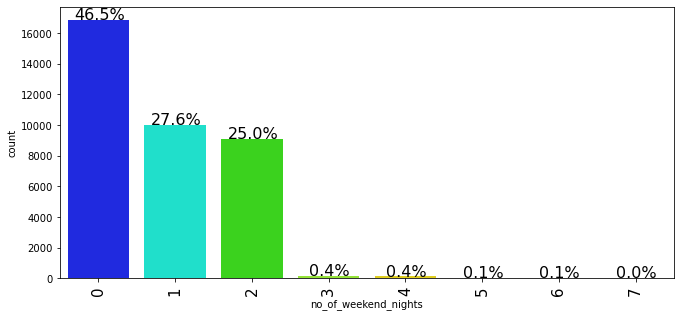

<IPython.core.display.Javascript object>

In [286]:
# Creating a labeled_barplot for the variable no_of_weekend nights
labeled_barplot(data, "no_of_weekend_nights", perc=True, n=10)

In [297]:
# Checking the total of samples including 2 no of weekend nights
print(
    "Number of samples with 0 weekend nights =",
    data[data["no_of_weekend_nights"] == 0].value_counts().sum(),
)
print(
    "Number of samples with 1 weekend nights =",
    data[data["no_of_weekend_nights"] == 1].value_counts().sum(),
)
print(
    "Number of samples with 2 weekend nights =",
    data[data["no_of_weekend_nights"] == 2].value_counts().sum(),
)

Number of samples with 0 weekend nights = 16872
Number of samples with 1 weekend nights = 9995
Number of samples with 2 weekend nights = 9071


<IPython.core.display.Javascript object>

In [295]:
# Validating the number of samples including 0 weekend nights and additionally were Canceled
data[
    (data["no_of_weekend_nights"] == 0) & (data["booking_status"] == 1)
].value_counts().sum()

5093

<IPython.core.display.Javascript object>

In [296]:
# Validating the number of samples including 0 weekend nights and additionally were Not Canceled
data[
    (data["no_of_weekend_nights"] == 0) & (data["booking_status"] == 0)
].value_counts().sum()

11779

<IPython.core.display.Javascript object>

In [298]:
# Validating the number of samples including 1 weekend nights and additionally were Canceled
data[
    (data["no_of_weekend_nights"] == 1) & (data["booking_status"] == 1)
].value_counts().sum()

3432

<IPython.core.display.Javascript object>

In [299]:
# Validating the number of samples including 1 weekend nights and additionally were Not Canceled
data[
    (data["no_of_weekend_nights"] == 1) & (data["booking_status"] == 0)
].value_counts().sum()

6563

<IPython.core.display.Javascript object>

In [300]:
# Validating the number of samples including 2 weekend nights and additionally were Canceled
data[
    (data["no_of_weekend_nights"] == 2) & (data["booking_status"] == 1)
].value_counts().sum()

3157

<IPython.core.display.Javascript object>

In [301]:
# Validating the number of samples including 2 weekend nights and additionally were Not Canceled
data[
    (data["no_of_weekend_nights"] == 2) & (data["booking_status"] == 0)
].value_counts().sum()

5914

<IPython.core.display.Javascript object>

In [288]:
# Relationship between the variables "no_of_weekend_nights" & "booking_status" with "avg_price_per_room"
data.groupby(["no_of_weekend_nights", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

no_of_weekend_nights  booking_status
6                     0                 76.73500
5                     0                 87.74000
7                     1                 90.95000
5                     1                 93.70172
4                     0                 96.20109
3                     0                 99.21000
2                     0                 99.51990
0                     0                 99.82051
1                     0                100.55953
6                     1                102.24563
3                     1                105.23270
2                     1                109.19424
1                     1                110.29711
0                     1                111.68183
4                     1                116.96855
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The 46.5% (16872 out 36275) of the samples include 0 weekend nights, 27.6% just 1 weekend night, the 25% include 2 weekend nights, 0.4% for 3 & 4 weekend nights, and the lowest percentage corresponds to the samples with 5 & 6 weekend nights with 0.1%.
* 5093 samples out 16872 belongs to the samples that includes 0 weekend nights in the reservation and were Canceled, representing the 30.72% of the total samples with 0 weekend nights.
* 11779 samples out 16872 belongs to the samples that includes 0 weekend nights in the reservation and were Not Canceled, representing the 69.81% of the total samples with 0 weekend nights.
* 3432 samples out 9995 belongs to the samples that includes 1 weekend night in the reservation and were Canceled, representing the 34.33% of the total samples with 1 weekend nights.
* 6563 samples out 9995 belongs to the samples that includes 1 weekend night in the reservation and were Not Canceled, representing the 65.66% of the total samples with 1 weekend nights.
* 3157 samples out 9071 belongs to the samples that includes 2 weekend night in the reservation and were Canceled, representing the 34.80% of the total samples with 2 weekend nights.
* 5914 samples out 9071 belongs to the samples that includes 2 weekend night in the reservation and were Not Canceled, representing the 65.20% of the total samples with 2 weekend nights.
* The cheapest costs belong to a greater number of weekend nights 7, 5, 6 nights with a mean price per room of 90.95€, 92.82€, and 97.14 respectively.

### required car parking space

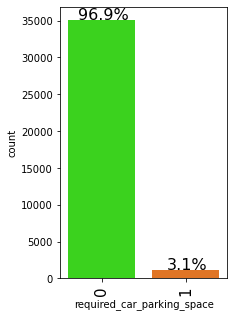

<IPython.core.display.Javascript object>

In [302]:
# Creating a labeled_barplot for the variable "required_car_parking_space"
labeled_barplot(data, "required_car_parking_space", perc=True)

In [312]:
print(
    "Number of samples with NOT required car parking space =",
    data[data["required_car_parking_space"] == 0].value_counts().sum(),
)
print(
    "Number of samples with required car parking space =",
    data[data["required_car_parking_space"] == 1].value_counts().sum(),
)

Number of samples with NOT required car parking space = 35151
Number of samples with required car parking space = 1124


<IPython.core.display.Javascript object>

In [305]:
# Validating the number of samples including NOT required_car_parking_space and additionally were Canceled
data[
    (data["required_car_parking_space"] == 0) & (data["booking_status"] == 1)
].value_counts().sum()

11771

<IPython.core.display.Javascript object>

In [311]:
# Validating the number of samples including NOT required_car_parking_space and additionally were Not Canceled
data[
    (data["required_car_parking_space"] == 0) & (data["booking_status"] == 0)
].value_counts().sum()

23380

<IPython.core.display.Javascript object>

In [308]:
# Validating the number of samples including a required_car_parking_space and additionally were Canceled
data[
    (data["required_car_parking_space"] == 1) & (data["booking_status"] == 1)
].value_counts().sum()

114

<IPython.core.display.Javascript object>

In [309]:
# Validating the number of samples including a required_car_parking_space and additionally were Not Canceled
data[
    (data["required_car_parking_space"] == 1) & (data["booking_status"] == 0)
].value_counts().sum()

1010

<IPython.core.display.Javascript object>

In [304]:
# Relationship between the variables "required_car_parking_space" & "booking_status" with "avg_price_per_room"
data.groupby(["required_car_parking_space", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

required_car_parking_space  booking_status
0                           0                 99.33552
                            1                110.36400
1                           0                113.72531
                            1                130.75991
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The 96.9% (35151 out 36275) of the samples belongs to a NOT car parking space request, and just the 3.1% did required car parking space.
* 11771 samples out 35151 belongs to the samples that NOT included a car parking space request in the reservation and were Canceled, representing the 33.48% of the total samples with NOT required car parking space.
* 23380 samples out 35151 belongs to the samples that NOT included a car parking space request in the reservation and were Not Canceled, representing the 66.51% of the total samples with NOT required car parking space.
* 114 samples out 1124 belongs to the samples that included a car parking space request in the reservation and were Canceled, representing the 10.14% of the total samples with a required car parking space.
* 1010 samples out 1124 belongs to the samples that included a car parking space request in the reservation and were Not Canceled, representing the 89.85% of the total samples with a required car parking space.
* The most expensive mean price belongs to the bookings which required a car space parking with a mean cost of 115.45€.

### type of meal plan

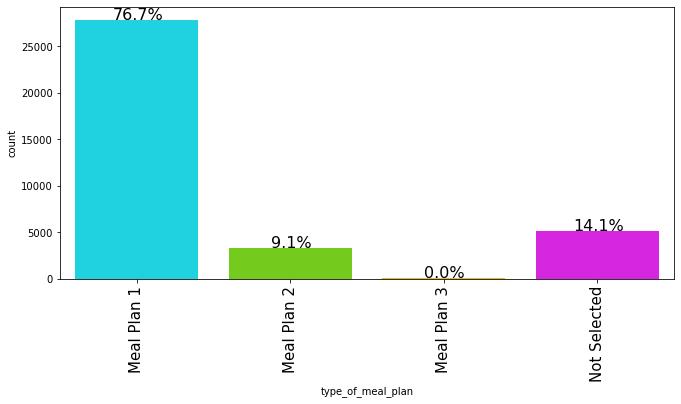

<IPython.core.display.Javascript object>

In [313]:
# Creating a labeled_barplot for the variable "type of mean plan"
labeled_barplot(data, "type_of_meal_plan", perc=True, n=10)

In [314]:
print(
    "Number of samples with Meal Plan 1 =",
    data[data["type_of_meal_plan"] == "Meal Plan 1"].value_counts().sum(),
)
print(
    "Number of samples with Meal Plan 2 =",
    data[data["type_of_meal_plan"] == "Meal Plan 2"].value_counts().sum(),
)
print(
    "Number of samples with Meal Plan 3 =",
    data[data["type_of_meal_plan"] == "Meal Plan 3"].value_counts().sum(),
)
print(
    "Number of samples with Not Selected =",
    data[data["type_of_meal_plan"] == "Not Selected"].value_counts().sum(),
)

Number of samples with Meal Plan 1 = 27835
Number of samples with Meal Plan 2 = 3305
Number of samples with Meal Plan 3 = 5
Number of samples with Not Selected = 5130


<IPython.core.display.Javascript object>

In [316]:
# Validating the number of samples including type_of_meal_plan 1 and additionally were Canceled
data[
    (data["type_of_meal_plan"] == "Meal Plan 1") & (data["booking_status"] == 1)
].value_counts().sum()

8679

<IPython.core.display.Javascript object>

In [317]:
# Validating the number of samples including type_of_meal_plan 1 and additionally were Not Canceled
data[
    (data["type_of_meal_plan"] == "Meal Plan 1") & (data["booking_status"] == 0)
].value_counts().sum()

19156

<IPython.core.display.Javascript object>

In [323]:
# Relationship between the variables "type_of_meal_plan" & "booking_status" with "avg_price_per_room"
data.groupby(["type_of_meal_plan", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

type_of_meal_plan  booking_status
Meal Plan 3        0                  0.00000
Not Selected       1                 94.56715
                   0                 95.07770
Meal Plan 1        0                 99.98448
Meal Plan 2        0                108.84539
Meal Plan 1        1                111.51652
Meal Plan 2        1                123.02379
Meal Plan 3        1                206.00000
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The 76.7% (27835 out 36275) of the samples include Meal Plan 1, 14.1%(5130) are Not Selected, the 9.1% represents the Meal Plan 2.
* 8679 samples out 27835 belongs to the samples that included a Meal Plan 1 request in the reservation and were Canceled, representing the 31.18% of the total samples with a Meal Plan 1.
* 19156 samples out 27835 belongs to the samples that included a Meal Plan 1 request in the reservation and were Not Canceled, representing the 68.81% of the total samples with a Meal Plan 1.
* The cheapest costs belong to Meal Plan 3 with a mean price of 41.20€, Not selected plan has a mean price per room of 94.80€, the meal plan 1 has mean price of 103.58€, and the most expensive average price per room is for the Meal Plan 2.

### room type reserved

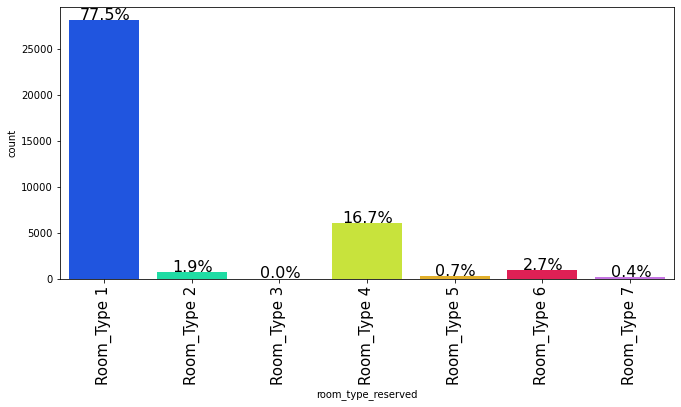

<IPython.core.display.Javascript object>

In [318]:
# Creating a labeled_barplot for the variable "room type reserved"
labeled_barplot(data, "room_type_reserved", perc=True, n=10)

In [320]:
print(
    "Number of samples with Room_Type 1 =",
    data[data["room_type_reserved"] == "Room_Type 1"].value_counts().sum(),
)


Number of samples with Room_Type 1 = 28130


<IPython.core.display.Javascript object>

In [321]:
# Validating the number of samples including a Room_Type 1 and additionally were Canceled
data[
    (data["room_type_reserved"] == "Room_Type 1") & (data["booking_status"] == 1)
].value_counts().sum()

9072

<IPython.core.display.Javascript object>

In [322]:
# Validating the number of samples including a Room_Type 1 and additionally were Not Canceled
data[
    (data["room_type_reserved"] == "Room_Type 1") & (data["booking_status"] == 0)
].value_counts().sum()

19058

<IPython.core.display.Javascript object>

In [324]:
# Relationship between the variables "room_type_reserved" & "booking_status" with "avg_price_per_room"
data.groupby(["room_type_reserved", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

room_type_reserved  booking_status
Room_Type 3         0                 61.00000
Room_Type 2         0                 82.73198
Room_Type 1         0                 93.16397
Room_Type 2         1                 98.26123
Room_Type 1         1                101.66545
Room_Type 3         1                105.37500
Room_Type 5         0                118.30725
Room_Type 4         0                121.53306
                    1                132.52365
Room_Type 7         0                133.75885
Room_Type 5         1                138.27931
Room_Type 6         0                177.30334
                    1                188.98456
Room_Type 7         1                227.85417
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The 77.5% (28130 out 36275) of the samples included a Room_Type 1, 16.7%  a Room_Type 4, the 2.7% represents a Room_Type 4 request.
* 9072 samples out 28130 belongs to the samples that included a Room_Type 1 request in the reservation and were Canceled, representing the 32.25% of the total samples with a Room_Type 1.
* 19058 samples out 28130 belongs to the samples that included a Room_Type 1 request in the reservation and were Not Canceled, representing the 67.74% of the total samples with a Room_Type 1.
* The cheapest costs belong to Room_Type 3 Not canceled with a mean price of 61€, and the most expensive average price per room is for the Room_Type 7 (Canceled) with an average price of 227.85€.

### arrival month

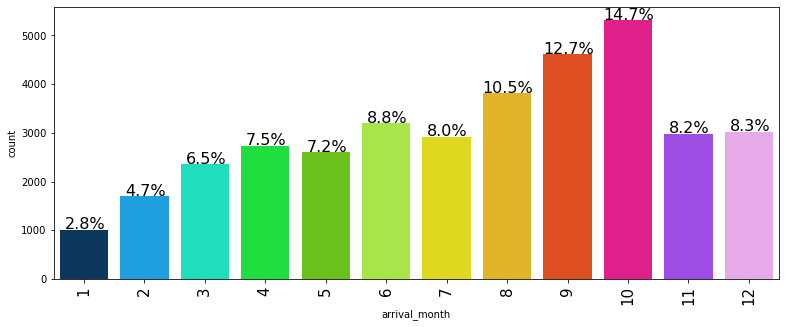

<IPython.core.display.Javascript object>

In [329]:
# Creating a labeled_barplot for the variable "arrival month"
labeled_barplot(data, "arrival_month", perc=True, n=12)

In [326]:
# Validating the number of samples with arrival_month in October and additionally were Canceled
data[(data["arrival_month"] == 10) & (data["booking_status"] == 1)].value_counts().sum()

1880

<IPython.core.display.Javascript object>

In [327]:
# Validating the number of samples with arrival_month in October and additionally were Not Canceled
data[(data["arrival_month"] == 10) & (data["booking_status"] == 0)].value_counts().sum()

3437

<IPython.core.display.Javascript object>

In [328]:
# Relationship between the variables "arrival_month" & "booking_status" with "avg_price_per_room"
data.groupby(["arrival_month", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

arrival_month  booking_status
1              0                 74.69541
               1                 76.99167
2              1                 79.70272
               0                 81.08160
3              0                 87.31017
12             0                 87.94435
11             0                 89.43417
12             1                 95.51813
11             1                 95.73903
4              0                 99.56046
10             0                101.56882
3              1                102.20149
4              1                106.26529
6              0                109.52574
10             1                109.74810
8              0                110.11637
7              0                110.70353
5              0                112.34992
9              0                112.49836
7              1                112.80528
6              1                115.58132
5              1                116.35313
8              1                118.02838
9   

<IPython.core.display.Javascript object>

#### Observations:
* The 14.7% of the samples has the arrival month in October, 12.7% in September, the 10.5% August, 8.8% in June, the 8.3% in December, 8.2% in November, 8% in July, 7.5% in April, 7.2% in May, the 6.5% in March, the 4.7% in February, and the 2.8% in January.
* 1880 samples out 5317 belongs to the samples that has October as the arrival month in the reservation and were Canceled, representing the 35.35% of the total samples with the arrival month in October.
* 3437 samples out 5317 belongs to the samples that has October as the arrival month in the reservation and were Not Canceled, representing the 64.64% of the total samples with the arrival month in October.
* The cheapest costs belong to the sample with the arrival month in January with a mean price between 74-76€, and the most expensive average price per room is for the arrival month in August and September with an average price between 118-123€.
* The largest number of samples for the variable of the month of arrival is concentrated between the months of summer and the beginning of autumn and also seems to coincide with the logic of demand and supply of a market, since the highest prices are observed in these same markets. months.

### market segment type

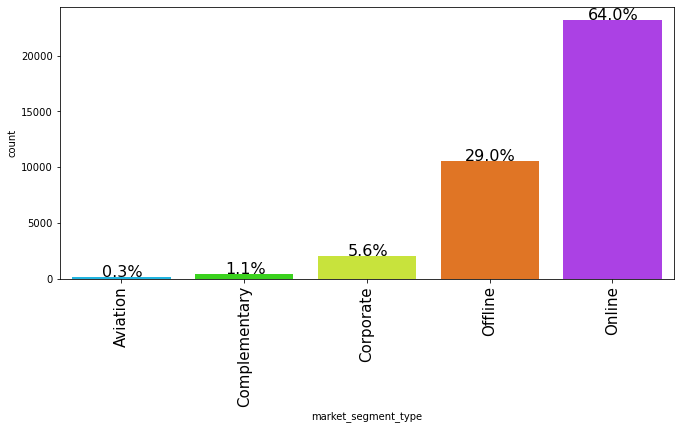

<IPython.core.display.Javascript object>

In [41]:
# Creating a labeled_barplot for the variable "market segment type"
labeled_barplot(
    data, "market_segment_type", perc=True, n=10
)  

In [330]:
print(
    "Number of samples with Online =",
    data[data["market_segment_type"] == "Online"].value_counts().sum(),
)
print(
    "Number of samples with Offline =",
    data[data["market_segment_type"] == "Offline"].value_counts().sum(),
)
print(
    "Number of samples with Corporate =",
    data[data["market_segment_type"] == "Corporate"].value_counts().sum(),
)
print(
    "Number of samples with Complementary =",
    data[data["market_segment_type"] == "Complementary"].value_counts().sum(),
)
print(
    "Number of samples with Aviation =",
    data[data["market_segment_type"] == "Aviation"].value_counts().sum(),
)

Number of samples with Online = 23214
Number of samples with Offline = 10528
Number of samples with Corporate = 2017
Number of samples with Complementary = 391
Number of samples with Aviation = 125


<IPython.core.display.Javascript object>

In [331]:
# Validating the number of samples with an Online "market_segment_type" and additionally were Canceled
data[
    (data["market_segment_type"] == "Online") & (data["booking_status"] == 1)
].value_counts().sum()

8475

<IPython.core.display.Javascript object>

In [332]:
# Validating the number of samples with an Online "market_segment_type" and additionally were Not Canceled
data[
    (data["market_segment_type"] == "Online") & (data["booking_status"] == 0)
].value_counts().sum()

14739

<IPython.core.display.Javascript object>

In [333]:
# Validating the number of samples with an Offline "market_segment_type" and additionally were Canceled
data[
    (data["market_segment_type"] == "Offline") & (data["booking_status"] == 1)
].value_counts().sum()

3153

<IPython.core.display.Javascript object>

In [334]:
# Validating the number of samples with an Offline "market_segment_type" and additionally were Not Canceled
data[
    (data["market_segment_type"] == "Offline") & (data["booking_status"] == 0)
].value_counts().sum()

7375

<IPython.core.display.Javascript object>

In [335]:
# Relationship between the variables "market_segment_type" & "booking_status" with "avg_price_per_room"
data.groupby(["market_segment_type", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

market_segment_type  booking_status
Complementary        0                  3.14176
Corporate            0                 81.37061
Offline              0                 87.68520
Corporate            1                 95.49995
Aviation             0                100.05682
Offline              1                100.75167
Aviation             1                102.24324
Online               0                110.88896
                     1                114.63579
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The 64% (23214 out 36275) of the samples included an Online Market_segment_type, 29%  an Offline market_segment_Type, the 5.6% represents the Corporate market_segment_type, 1.1% Complementary, and 0.3% Aviation market_segment_type.
* 8475 samples out 23214 belongs to the samples that included a Online Market_segment_type in the reservation and were Canceled, representing the 36.50% of the total samples with an Online Market_segment_type.
* 14739 samples out 23214 belongs to the samples that included a Online Market_segment_type in the reservation and were Not Canceled, representing the 63.49% of the total samples with an Online Market_segment_type.
* 3153 samples out 10528 belongs to the samples that included a Offline Market_segment_type in the reservation and were Canceled, representing the 29.94% of the total samples with an Offline Market_segment_type.
* 7375 samples out 10528 belongs to the samples that included a Offline Market_segment_type in the reservation and were Not Canceled, representing the 70.05% of the total samples with an Offline Market_segment_type.
* The cheapest costs belong to the Complementary with a mean price of 3.14€, and the most expensive average price per room is for the Online market_segment_type with an average price between 111-115€.

### number of special requests

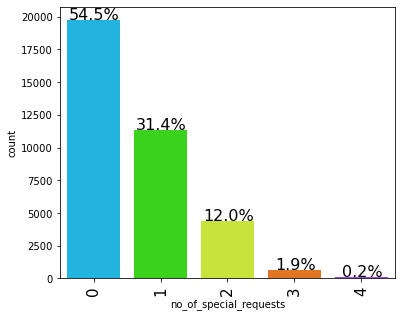

<IPython.core.display.Javascript object>

In [336]:
# Creating a labeled_barplot for the variable "number_of_special_requests"
labeled_barplot(data, "no_of_special_requests", perc=True, n=5)

In [344]:
print(
    "Number of samples with 0 no_of_special_requests =",
    data[data["no_of_special_requests"] == 0].value_counts().sum(),
)
print(
    "Number of samples with 1 no_of_special_requests =",
    data[data["no_of_special_requests"] == 1].value_counts().sum(),
)
print(
    "Number of samples with 2 no_of_special_requests =",
    data[data["no_of_special_requests"] == 2].value_counts().sum(),
)
print(
    "Number of samples with 3 no_of_special_requests =",
    data[data["no_of_special_requests"] == 3].value_counts().sum(),
)
print(
    "Number of samples with 4 no_of_special_requests =",
    data[data["no_of_special_requests"] == 4].value_counts().sum(),
)

Number of samples with 0 no_of_special_requests = 19777
Number of samples with 1 no_of_special_requests = 11373
Number of samples with 2 no_of_special_requests = 4364
Number of samples with 3 no_of_special_requests = 675
Number of samples with 4 no_of_special_requests = 78


<IPython.core.display.Javascript object>

In [338]:
# Validating the number of samples with 0 no_of_special_requests and additionally were Canceled
data[
    (data["no_of_special_requests"] == 0) & (data["booking_status"] == 1)
].value_counts().sum()

8545

<IPython.core.display.Javascript object>

In [339]:
# Validating the number of samples with 0 no_of_special_requests and additionally were Not Canceled
data[
    (data["no_of_special_requests"] == 0) & (data["booking_status"] == 0)
].value_counts().sum()

11232

<IPython.core.display.Javascript object>

In [340]:
# Validating the number of samples with 1 no_of_special_requests and additionally were Canceled
data[
    (data["no_of_special_requests"] == 1) & (data["booking_status"] == 1)
].value_counts().sum()

2703

<IPython.core.display.Javascript object>

In [341]:
# Validating the number of samples with 1 no_of_special_requests and additionally were Not Canceled
data[
    (data["no_of_special_requests"] == 1) & (data["booking_status"] == 0)
].value_counts().sum()

8670

<IPython.core.display.Javascript object>

In [342]:
# Validating the number of samples with 2 no_of_special_requests and additionally were Canceled
data[
    (data["no_of_special_requests"] == 2) & (data["booking_status"] == 1)
].value_counts().sum()

637

<IPython.core.display.Javascript object>

In [343]:
# Validating the number of samples with 2 no_of_special_requests and additionally were Canceled
data[
    (data["no_of_special_requests"] == 2) & (data["booking_status"] == 0)
].value_counts().sum()

3727

<IPython.core.display.Javascript object>

In [345]:
# Relationship between the variables "market_segment_type" & "booking_status" with "avg_price_per_room"
data.groupby(["no_of_special_requests", "booking_status"])[
    "avg_price_per_room"
].mean().sort_values(ascending=True).head(30)

no_of_special_requests  booking_status
0                       0                 90.59521
1                       0                102.52026
0                       1                108.71105
4                       0                110.07103
1                       1                115.20052
2                       1                115.66469
5                       0                118.12500
3                       0                118.29699
2                       0                118.46795
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

#### Observations:
* The 54.5% (19777 out 36275) of the samples included 0 no_of_special_requests, 31.4%  included 1 no_of_special_requests, 12%  included 2 no_of_special_requests, 1.9% included 3 no_of_special_requests, and the 0.2% included 4 no_of_special_requests.
* 8545 samples out 19777 belongs to the samples that included 0 no_of_special_requests in the reservation and were Canceled, representing the 43.20% of the total samples with 0 no_of_special_requests.
* 11232 samples out 19777 belongs to the samples that included 0 no_of_special_requests in the reservation and were Not Canceled, representing the 56.79% of the total samples with 0 no_of_special_requests.
* 2703 samples out 11373 belongs to the samples that included 1 no_of_special_requests in the reservation and were Canceled, representing the 23.76% of the total samples with 1 no_of_special_requests.
* 8670 samples out 11373 belongs to the samples that included 1 no_of_special_requests in the reservation and were Not Canceled, representing the 76.23% of the total samples with 1 no_of_special_requests.
* 637 samples out 4364 belongs to the samples that included 2 no_of_special_requests in the reservation and were Canceled, representing the 14.59% of the total samples with 2 no_of_special_requests.
* 3727 samples out 4364 belongs to the samples that included 2 no_of_special_requests in the reservation and were Not Canceled, representing the 85.40% of the total samples with 2 no_of_special_requests.
* The cheapest costs belong to the 0 reuqest category with a mean price of 90.59€, and the most expensive average price per room is for 5,3, and 2 special request with an average price of 118€.

### booking status

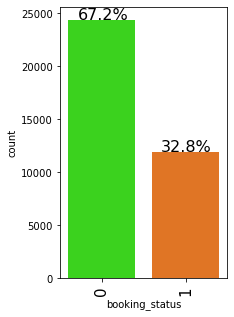

<IPython.core.display.Javascript object>

In [506]:
# Creating a labeled_barplot for the variable booking status (target variable)
labeled_barplot(data, "booking_status", perc=True)

In [44]:
data["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* In general, the percentual weight for the bookings corresponds to 67.2% for the Not canceled reservations and 32.8% for the Canceled reservations.

### Bivariate Analysis

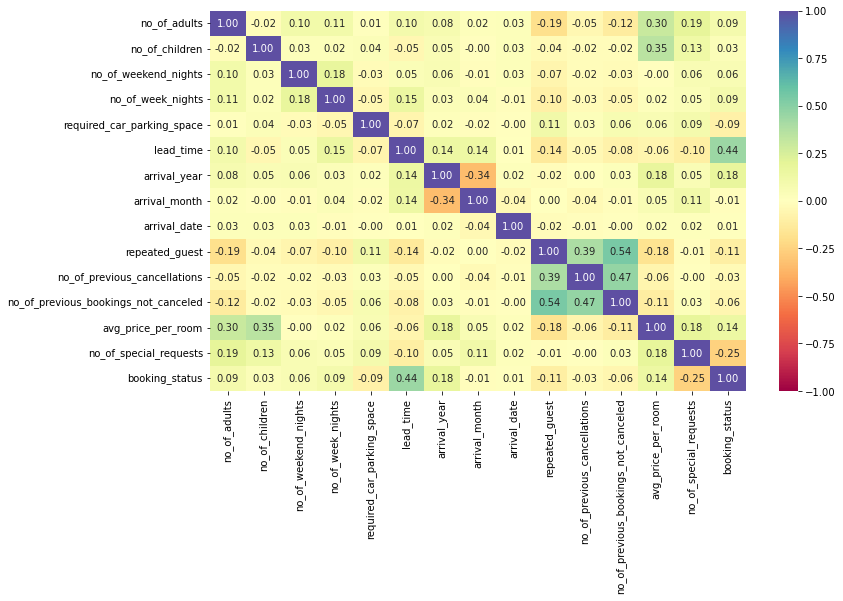

<IPython.core.display.Javascript object>

In [46]:
# Creating a Correlation matrix to evalute Pearson's cofficient between the variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations:
* From this table we can establish the strongest or the weakest correlations between the variables according to the Pearson's coefficient and get an idea of the possible existence of collinearity.
  * no_of_adults vs average_price_per_room = + 0.30
  * no_of_children vs avg_price_per_room = + 0.35
  * lead_time vs booking_status = + 0.44
  * arrival_year vs arrival_month = - 0.34
  * repeated_guest vs no_of_previous_cancellations = + 0.39
  * repeated_guest vs no_of_previous_bookings_not_cancellations = + 0.54
  * no_of_previous_cancellations vs no_of_previous_bookings_not_cancellations = + 0.47
  * avg_per_room vs no_of_adults = + 0.30
  * avg_per_room vs no_of_children = + 0.35
  

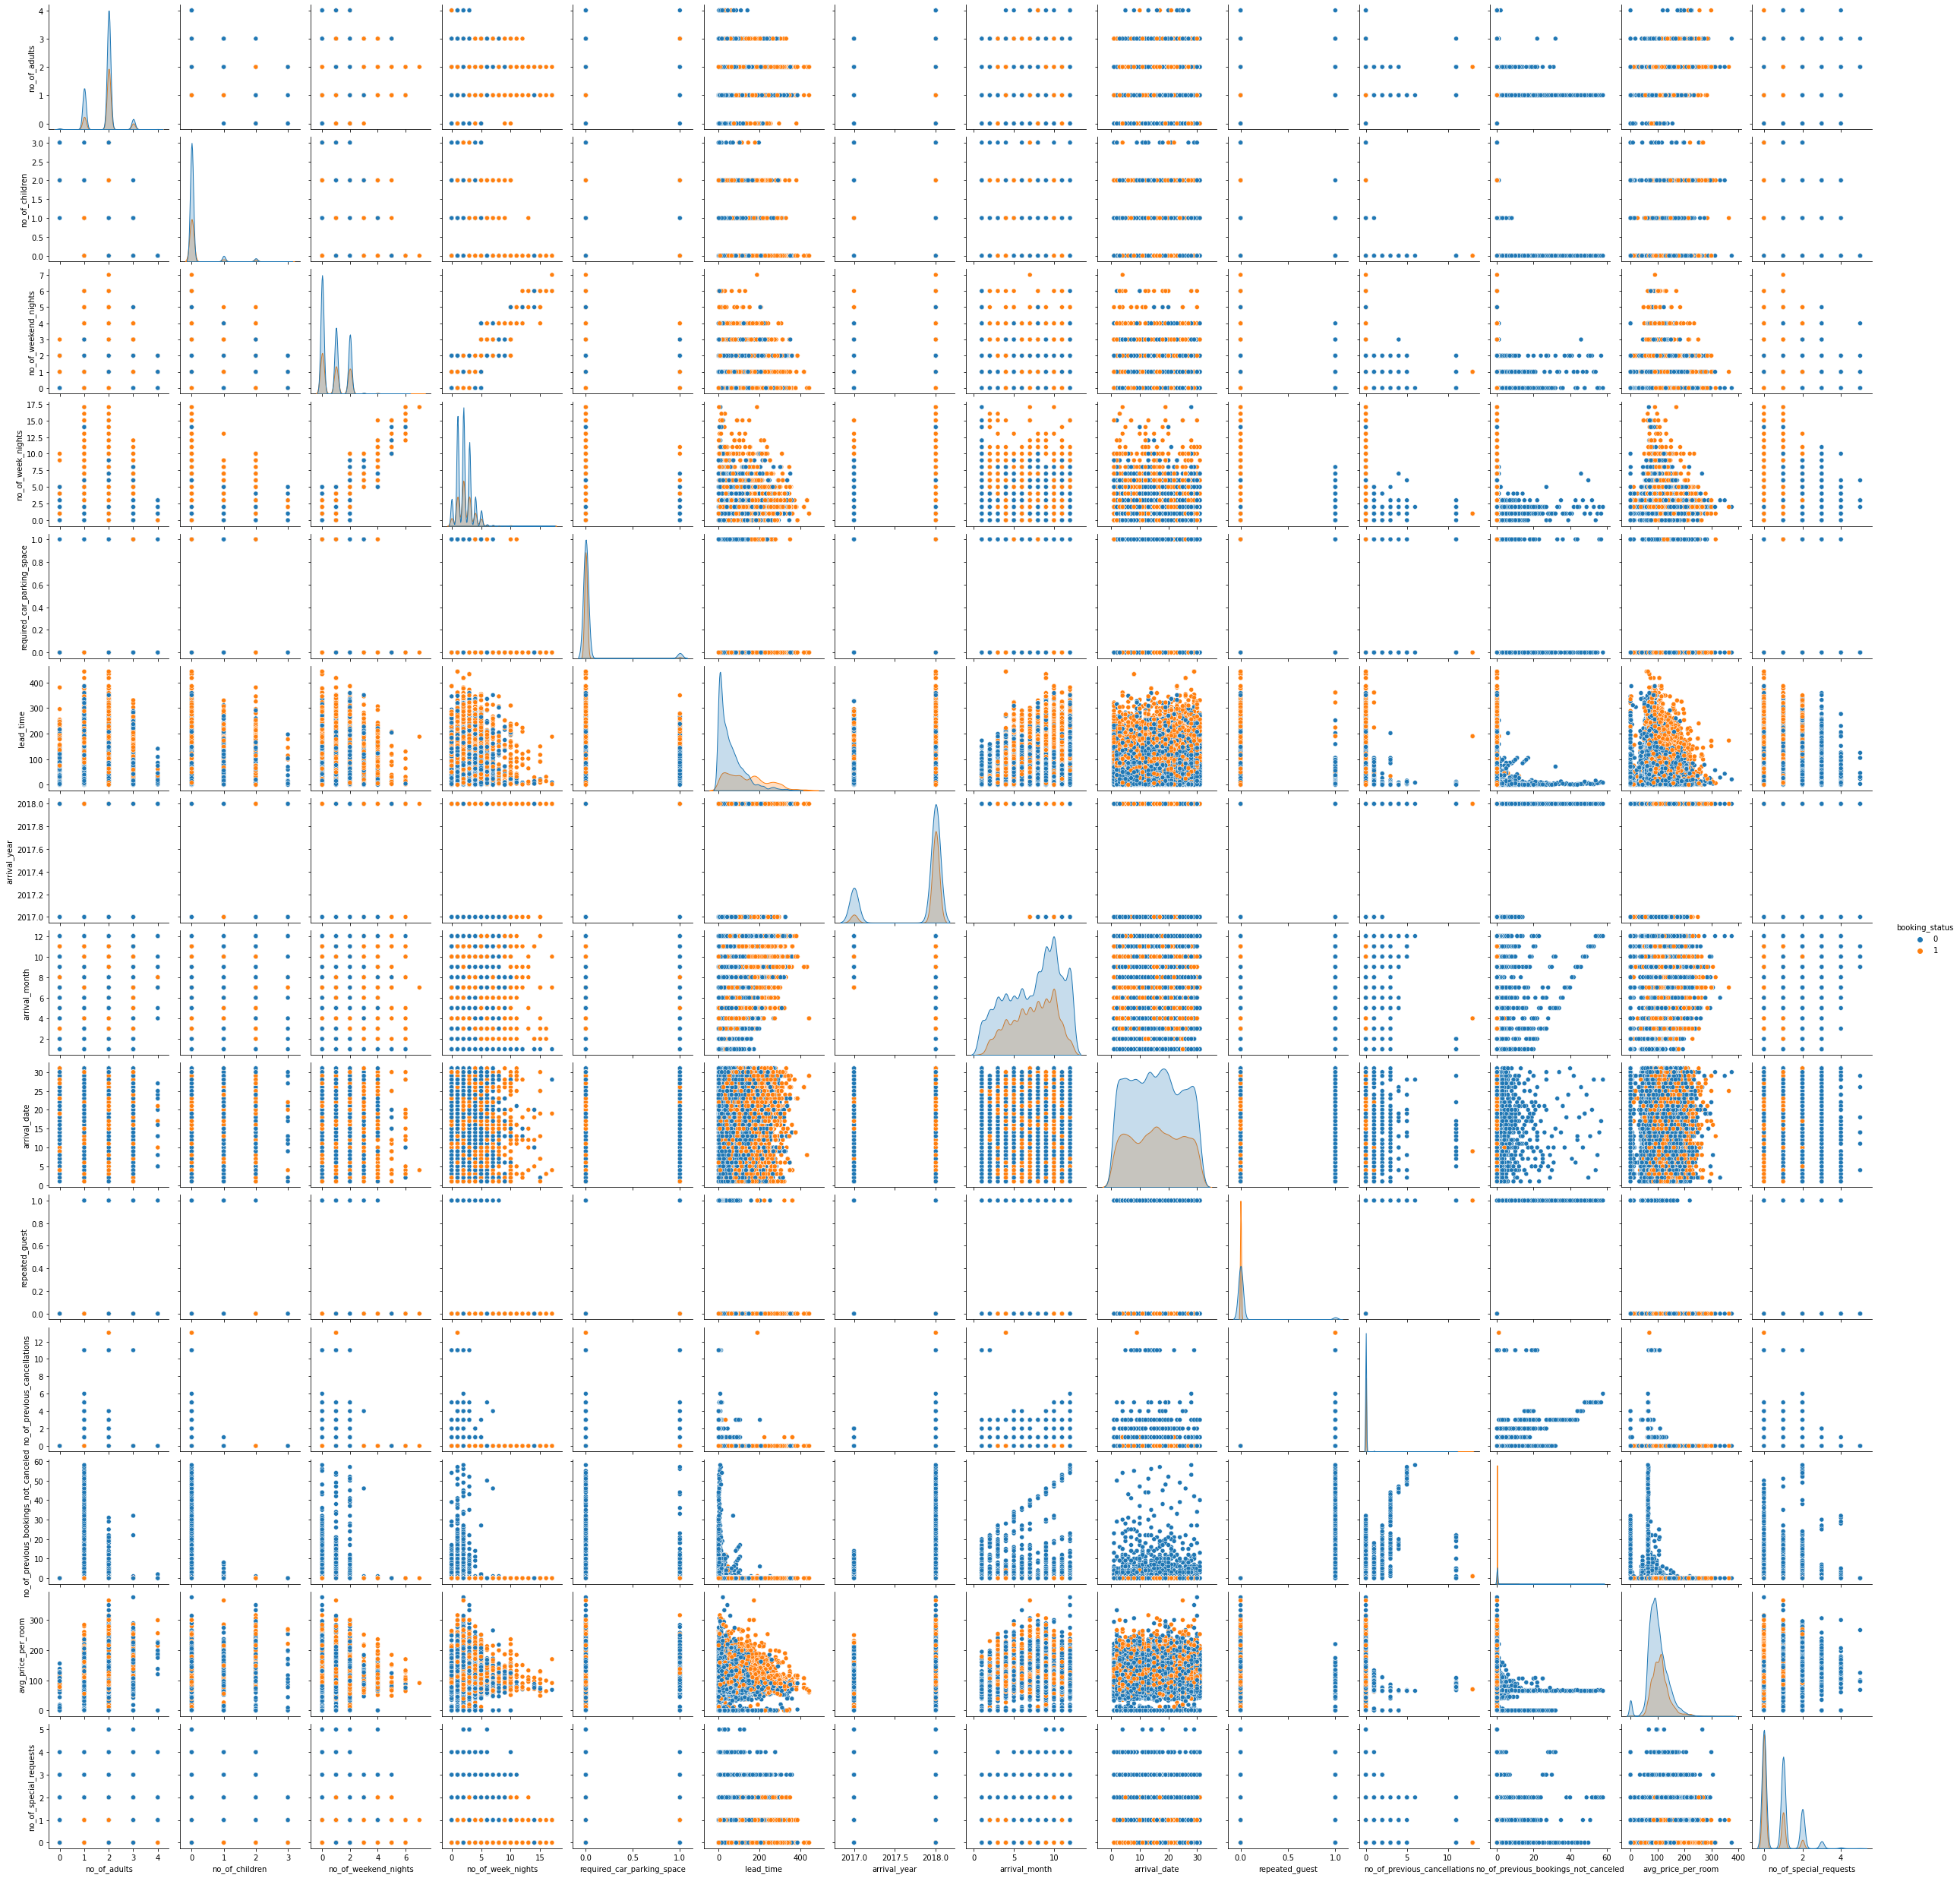

<IPython.core.display.Javascript object>

In [346]:
sns.pairplot(data, hue="booking_status")
plt.show()

#### Observations:
  * When we observe the distribution plots on diagonals for Class 0 (Not canceled) and 1 (Canceled) seems to overlap a little.

### Useful functions to create the graphs for further analysis 

In [373]:
# Taken from the German_credit_case_Study
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="purple",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="blue",
        stat="density",
    )
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [356]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Evaluating the relationship between the cost per room and the market segment type**

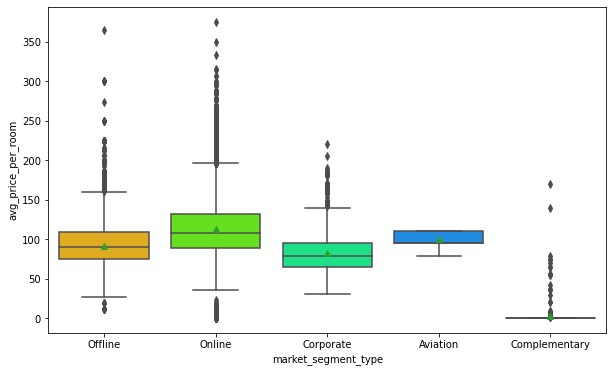

<IPython.core.display.Javascript object>

In [357]:
# Boxplot to evaluate the statistical parameters by market segment type
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="market_segment_type",
    y="avg_price_per_room",
    palette="gist_rainbow",
    showmeans=True,
)
plt.show()

#### Observations:
  * We can observe that the variance is very similar in the Online, Offline, and Corporate market segment.
  * The mean is a little bit higher in the Online market segment.
  * The maximun and the minimun average price belongs to the Online Market segment as well.
  * There are some outliers in all the market segment categories excepting in the Aviation category.
  * Offline, Online, and Corporate categories seems to have a normal distribution.
  * Outliers seems to be in a normal range. Although, we would have to investigate a little more about the conditions that apply to each market segment. 
  

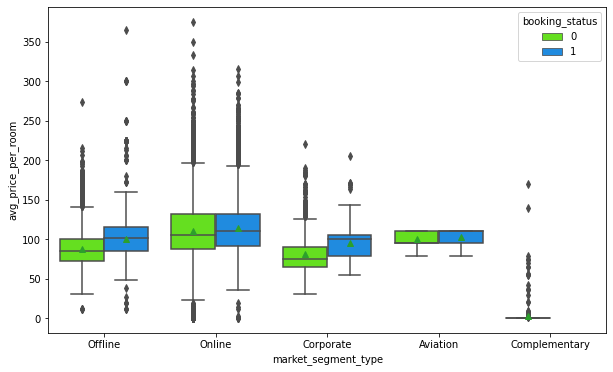

<IPython.core.display.Javascript object>

In [358]:
# Boxplot to evaluate the statistical parameters by market segment type and the bookings status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="market_segment_type",
    y="avg_price_per_room",
    palette="gist_rainbow",
    hue="booking_status",
    showmeans=True,
)
plt.show()

#### Observations:
  * We can observe that the variance is very similar in the Online, Offline, and Corporate market segment.
  * The mean and the median is a little bit higher in the Online market segment.
  * The maximun and the minimun average price belongs to the Online Market segment as well.
  * There are some outliers in all the market segment categories excepting in the Aviation category.
  * Offline, Online, and Corporate categories seems to have a normal distribution.
  * Seems to be higher the mean and the median in the Offline, Online, and Corporate segment where the reservations were Canceled.
  * Outliers seems to be in a normal range. Although, we would have to investigate a little more about the conditions that apply to each market segment.
  

**Variation of the booking status according to the market segments**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


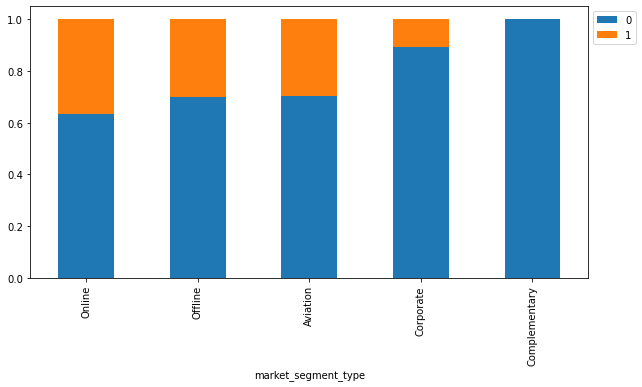

<IPython.core.display.Javascript object>

In [359]:
# Creating a stacked barplot for no of special requests and booking status
# Taken from German_Credit_case
stacked_barplot(data, "market_segment_type", "booking_status")

#### Observations:
  * As we observed earlier, the online market segment is more likely to have cancelations, followed by Offline, Aviation, and corporate. Complementary market segment has no Canceled bookings.

**Special requirements against booking status**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


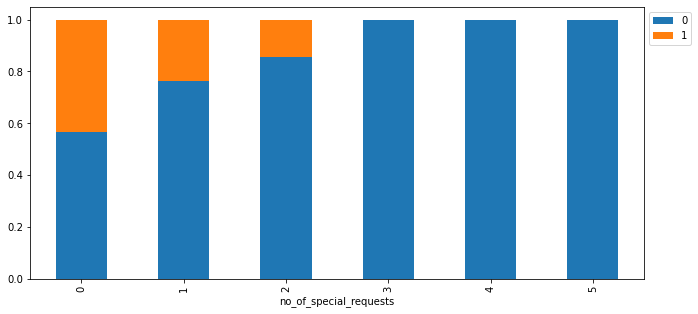

<IPython.core.display.Javascript object>

In [360]:
# Creating a stacked barplot for no of special requests and booking status
stacked_barplot(data, "no_of_special_requests", "booking_status")

#### Observations:
  * As we observed earlier, the number of bookings with 0 special request is more likely to have cancelations, followed by the bookings with 1 and 2 special request. 3, 4, and 5 special request seems to has no Canceled bookings.

**Special requests against average price per room**

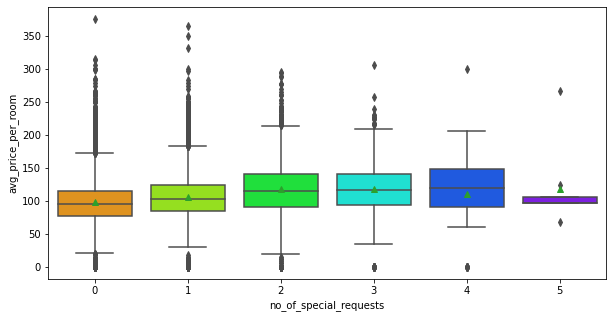

<IPython.core.display.Javascript object>

In [361]:
# Boxplot to evaluate the statistical parameters by no_of_special_requests and the avg_price_per_room
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="no_of_special_requests",
    y="avg_price_per_room",
    palette="gist_rainbow",
    showmeans=True,
)
plt.show()

#### Observations:
  * We can observe that the variance is very similar in all the categories within this variable excepting the 5 no odf special requests.
  * The mean and the median increase progressively until option 4, and 5 where the mean decreased.
  * The maximun average price per room belongs to the 0 special request categories.
  * There are outliers in all the categories, and some outliers in the options 3, 4, and 5 number of special requests.
  * All the option excepting option 5, seems to follow a normal distribution.
  * Outliers seems to be in a normal range. Although, we would have to investigate a little more about the conditions that apply to each category.

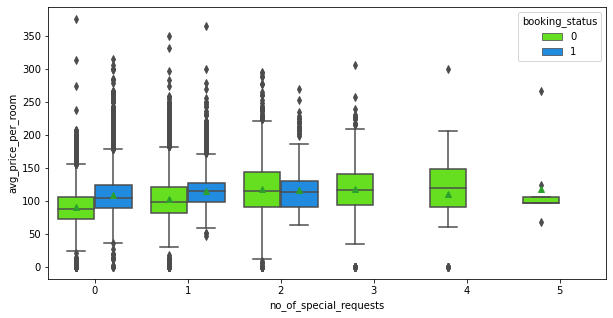

<IPython.core.display.Javascript object>

In [362]:
# Boxplot to evaluate the statistical parameters by no_of_special_requests and the avg_price_per_room
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="no_of_special_requests",
    y="avg_price_per_room",
    palette="gist_rainbow",
    hue="booking_status",
    showmeans=True,
)
plt.show()

#### Observations:
  * We can observe that the variance is very similar in the 0 and 1 special requests options. Additionally, the Canceled bookings have a higher mean and meadia than the Not Canceled options in the same group (0 and 1 special requests).
  * The mean and the median is higher in the 2 special request option for Not Canmceled bookings.
  * The maximun average price per room belongs to the 0 special request categories.
  * There are outliers in all the categories, and some outliers in the options 3, 4, and 5 number of special requests.
  * All the option excepting option 5, seems to follow a normal distribution.
  * Outliers seems to be in a normal range. Although, we would have to investigate a little more about the conditions that apply to each category.

#### Correlation between booking status and average price per room

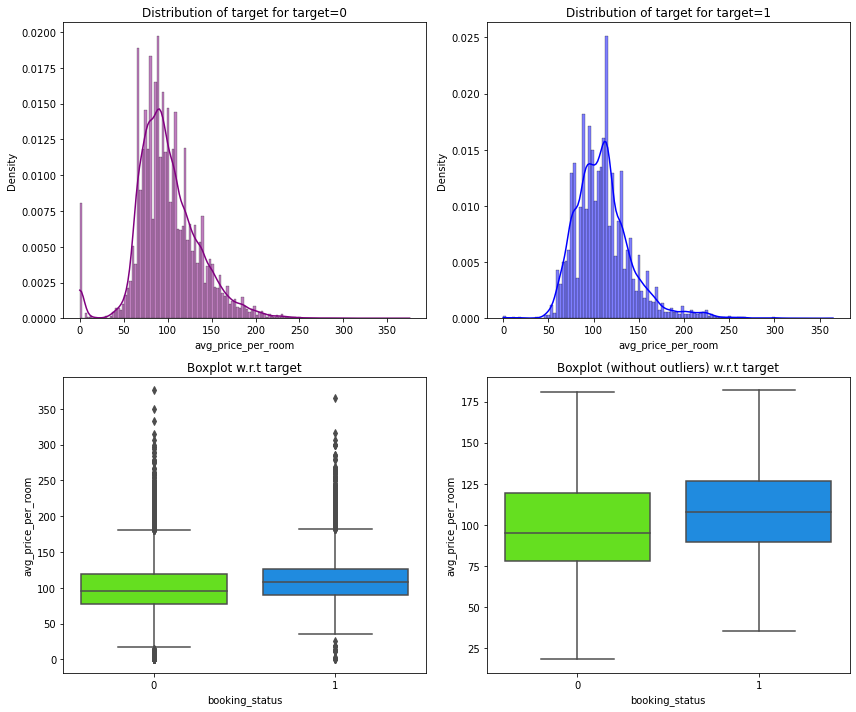

<IPython.core.display.Javascript object>

In [374]:
# Creating a wrt target plot with "avg_price_per_room" vs "booking_status"
# Taken from German_Credit_case
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

#### Observations:
* We can see that the third quartile amount of Canceled booking option is higher than the third quartile amount of Not Canceled option and the median as well.
* This shows that bookings with a higher average price per room are more likely to Cancel.
* There are outliers in boxplots of both class distributions.

#### booking status and lead time

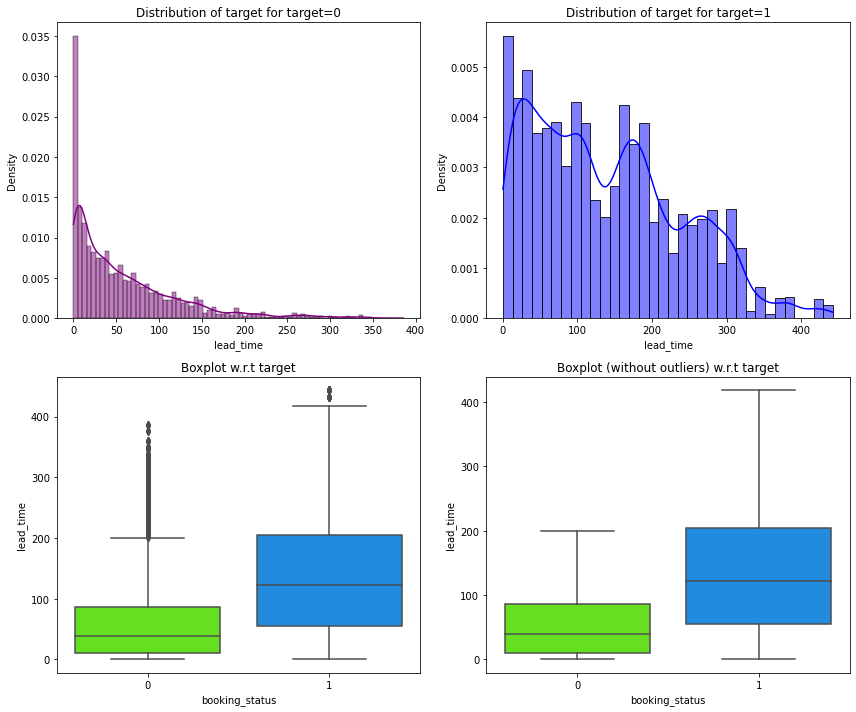

<IPython.core.display.Javascript object>

In [375]:
# Creating a wrt target plot with "lead_time" vs "booking_status"
# Taken from German_Credit_case
distribution_plot_wrt_target(data, "lead_time", "booking_status")

#### Observations:
* We can see that the third quartile amount of Canceled booking option is higher than the third quartile amount of Not Canceled option and the median as well.
* This shows that the bookings with a lead time are more likely to Cancel. In other words, as reservations are made much earlier, reservations will tend to be cancelled, which is very logical because it increases the chances of unforeseen events or any priority event for users.
* There are outliers in boxplots of both class distributions.

In [388]:
# Creating a variable to gather the people who travel with family(kids or wife) to see the impact on the cancelation rate
data_group_fam = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
data_group_fam.shape

(28441, 18)

<IPython.core.display.Javascript object>

In [389]:
data_group_fam["num_fam_members"] = (
    data_group_fam["no_of_adults"] + data_group_fam["no_of_children"]
)

<IPython.core.display.Javascript object>

booking_status       0     1    All
num_fam_members                    
All              18456  9985  28441
2                15506  8213  23719
3                 2425  1368   3793
4                  514   398    912
5                   11     6     17
------------------------------------------------------------------------------------------------------------------------


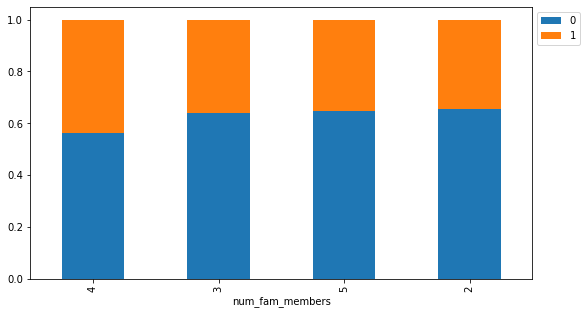

<IPython.core.display.Javascript object>

In [390]:
# Creating a stacked barplot to evaluate the impact between the number of family members for the reservation and Cancelation or Not Cancelation rate.
stacked_barplot(
    data_group_fam, "num_fam_members", "booking_status"
)

#### Observations:
* As the number of family members or companions increases, the number of canceled reservations seems to remain constant around 35%, except when the family group is 4, where it increases a little with respect to the rest of the categories, going over the 40%.

In [399]:
# Creating a variable by grouping the data related to the number of days
data_estadia = data[
    (data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)
]
data_estadia.shape

(17094, 18)

<IPython.core.display.Javascript object>

In [400]:
# Creating a column adding the week days and the weekends days for the total estadia
data_estadia["estadia_total"] = (
    data_estadia["no_of_week_nights"] + data_estadia["no_of_weekend_nights"]
)

<IPython.core.display.Javascript object>

booking_status      0     1    All
estadia_total                     
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

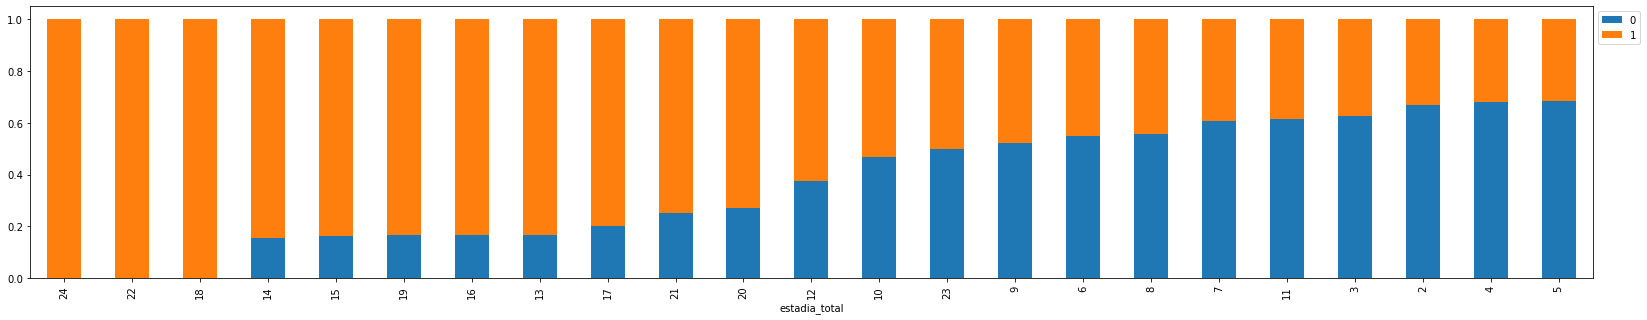

<IPython.core.display.Javascript object>

In [402]:
# Creating an stacked barplot for estadia_total and its relationship with booking status
stacked_barplot(data_estadia, "estadia_total", "booking_status")

#### Observations:
* In general, there seems to be a relationship between the number of days and the cancellation of reservations. This graph in most of its bars reflects that as the number of days increases, the reservation tends to be canceled.
* The highest rate of cancelations belongs to the 24,23, and 22 total days with 100% of Canceled reservations.
* The lowest rate of cancelations belongs to 3,4, and 5 total days with around the 35% of canceled reservations.

#### Repeating guest validation against booking status

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


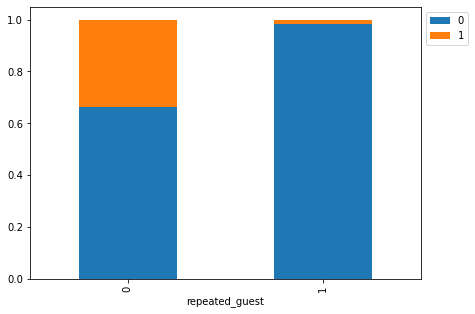

<IPython.core.display.Javascript object>

In [61]:
# Creating a stacked barplot for the relationship between repeated guests and booking status variables
stacked_barplot(
    data, "repeated_guest", "booking_status"
)  

#### Observations:
* It is evident from the graph that repeats guests very rarely cancel their reservations, just 1.72% of this sample has canceled.
* The non-repeat guest tend to cancel their reservations by 33.5%.

**Let's find out what are the busiest months in the hotel.**

In [405]:
data_per_month.head()

Month  Confirmed_guests
0      1              1014
1      2              1704
2      3              2358
3      4              2736
4      5              2598

<IPython.core.display.Javascript object>

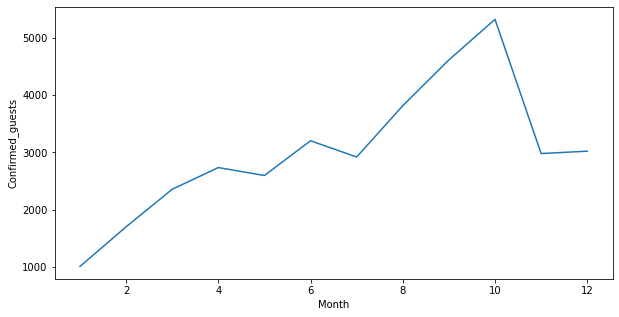

<IPython.core.display.Javascript object>

In [404]:
# lets group the data according to the arrival month and lets count the number of reservations per month using the booking status
data_per_month = data.groupby(["arrival_month"])["booking_status"].count()

# We have to create a dataframe with the data_per_month variable
data_per_month = pd.DataFrame(
    {
        "Month": list(data_per_month.index),
        "Confirmed_guests": list(data_per_month.values),
    }
)

# We have to plot the graph with the dataframe created
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_per_month, x="Month", y="Confirmed_guests")
plt.show()

#### Observations:
* As we discussed, the highest occurrence of hosts occurs between the summer months and early fall in October, where it then drops sharply from over 5,000 hosts to around 3,000.
* This correlates very well with the increase in the number of requests and the increase in prices between the same months.

#### Arrival month vs booking status

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


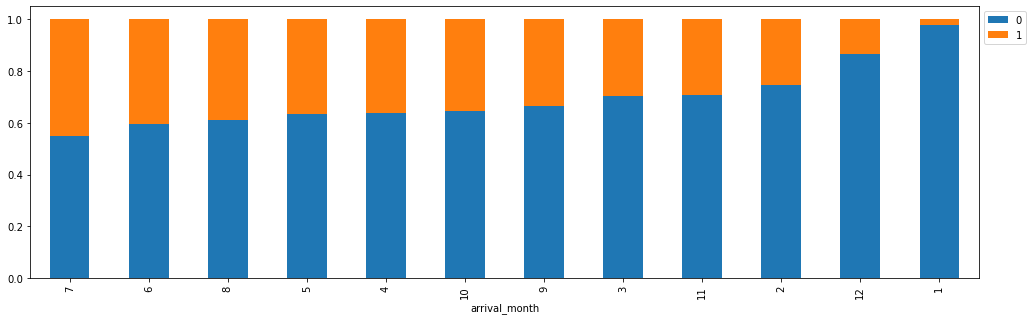

<IPython.core.display.Javascript object>

In [63]:
# Creating a stacked barplot for the variable arrival month against the booking status
stacked_barplot(
    data, "arrival_month", "booking_status"
) 

#### Observations:
* The highest number of cancellations occurs between the months of April and July with a percentage of cancellation between 40-45%.
* The lowest number of cancellations occurs between the months of December and January with a percentage of cancellations between 2-13%.

#### Variation of the prices over the differents months

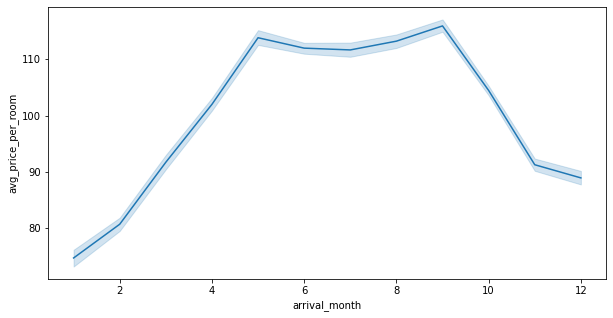

<IPython.core.display.Javascript object>

In [65]:
# Creatin a lineplot for the relationship between arrival month and average price per room
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room")
plt.show()

#### Observations:
* the prices increase notably from the month of February to the month of May, approximately from €80 to more than €110, Then they get stabilized in a kind of plateau until September, where they begin to fall abruptly to below €90.
* This behavior correlates very well with the increase in the number of requests and the increase in confirmed guests within the same months.

### Outlier Check

- checking the outliers in the data.

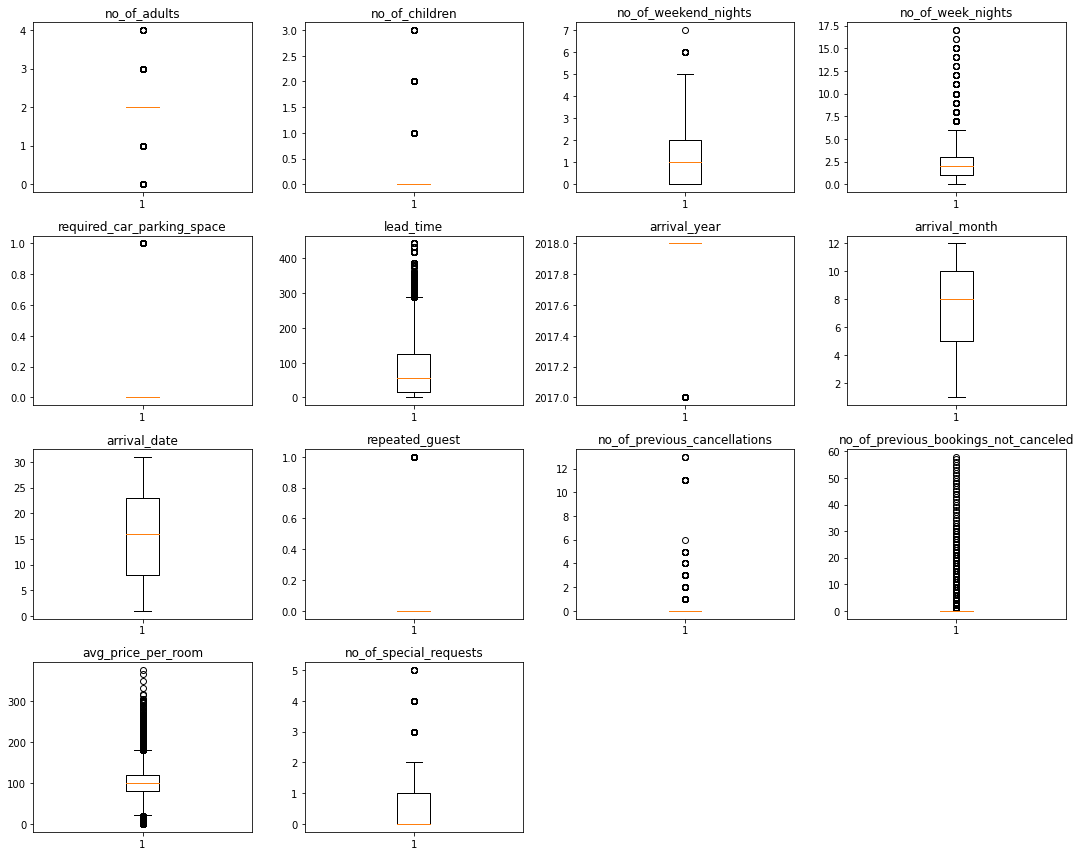

<IPython.core.display.Javascript object>

In [67]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
* No_of_Adults is a discrete variable.
* No_of_Children is a discrete variable.
* Required_car_parking_space is a binary variable. 
* Repeat_gueste is a binary variable.
* No_of_special_reuqest is a discrete variable.
* Arrival_year has just 2 options 2017/2018.
* lead_time has upper outliers mainly but the are in a normal range since there are people who usually make the reservation a long in advance.
* No_of_week_nights has upper outliers but they are in anormal range.
* Ave_price_per_room has upper oan lower outliers. Lower outliers possibly it is due to some type of reward for membership, accumulation of points, or agreements with the companies, for this it may be that we see the low price of the reservation 
* We are not applying an extra outlier treatment since they all of them seem to be within a normal range. 

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

### Data Preparation for modeling

In [421]:
# Dropping booking status and declare it as the target variable
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# Creating the dummies variables
X = pd.get_dummies(X, drop_first=True)

## splitting the data into train test in the ratio 70:30 with random_state = 1 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=1,
)

<IPython.core.display.Javascript object>

In [422]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

#### Observations:
* The percentual weight of the Class 0 (Not_canceled) witihin the trainning set is 67.06% and the percentual weight of the Class 1 (Canceled) is 32.93%.
* The percentual weight of the Class 0 (Not_canceled) witihin the test set is 67.63% and the percentual weight of the Class 1 (Canceled) is 32.36%.
* The argument Stratify was not neccesary to use because the distribution of the Classes in both datasets and were practically the same.

### Model evaluation criteria:
1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.(False Negatives)
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. (False Positives)

* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will be losing important resources and generating a negative impact in the cost structure.

* If we predict that a booking will get canceled and the booking doesn't get canceled it will be affecting the clients an the customer service generating an negative perception of the Hotel or brand. 

* The Hotel needs to maximized`F1 Score`, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

#### Creating the functions to create the confusion matrix and measuring the performance models.


In [71]:
# taken from German credit case
# Function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Validating probabilities greater than threshold
    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp) # rounding off the above values to get classes

    acc = accuracy_score(target, pred)   # computing the Accuracy
    recall = recall_score(target, pred)  # computing the Recall
    precision = precision_score(target, pred)  # computing Precision
    f1 = f1_score(target, pred)  # computing F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [72]:
# Taken from OnlineShoppers Purchasing Case
# Function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

In [423]:
# Dropping booking status and declare it as the target variable
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X)
# Creating dummies variables for X
X = pd.get_dummies(X, drop_first=True)  

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1
) 


<IPython.core.display.Javascript object>

In [424]:
# fitting the logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3292
Time:                        10:14:21   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

<IPython.core.display.Javascript object>

#### Observations:
* We have to remember that the coefficients of the logistic regression model are in terms of log(odd).
* `P>|z|`: The interpretation of p-values is similar to that in Linear Regression.
* P-values indicates the significance level of a variable. Any variable with a p-values less than 0.05 would be considered significant for the target variable.
* the variables arrival_date, no_of_previous_bookings_not_canceled, type_of_meal_plan_Meal Plan 3, room_type_reserved_Room_Type 3, market_segment_type_Complementary, and market_segment_type_Online possess a P values > 0.05 so we will drop them in the next steps.


In [425]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

<IPython.core.display.Javascript object>

#### Observations:
* After the first iteration of the model without removing anything, we can see that our accuracy is 80.6%, the recall metric is 63.41%, the precision 74% and F1 score is 68.28%.
* In this specific case: 
 * 1. If we predict that a customer will not cancel their booking but in reality, the customer will cancel their booking (False Negatives) the hotel is committing its resources and this negatively impacts the cost structure of the hotel.
 * 2. On the other hand, If we predict that a customer will cancel their booking but in reality, the customer will not cancel their booking (False Positives), We would be negatively impacting the image of customer service, which would generate bad reviews, customers who may not return, and a general damage to the image of the hotel and the entire chain in general.
* So for this particular case, we would be more interested in F1 Score to be maximized, since greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

### Multicollinearity

In [432]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [447]:
# Checking the VIF including all the variables of the first iteration
checking_vif(X_train)

feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27306
18        room_type_reserved_Room_Type 2        1.10595
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36361
21        room_type_reserved_Room_Type 5        1.02800
22        room_type_reserved_Room_Type 6        2.05614
23        room_type_reserved_Room_Type 7        1.11816
24     market_segment_type_Complementary        4.50276
25         market_segment_type_Corporate       16.92829
26           market_segment_type_Offline       64.11564
27            market_segment_type_Online       71.18026

<IPython.core.display.Javascript object>

#### Observations:
* We have just three categorical variables with a VIF  over 5 (market_segment_type_Corporate, market_segment_type_Offline, market_segment_type_Online) which is considered a moderate multicollinearity, all of these categories belongs to the same variable so we are going to ignore this criteria. Although, in this case we are going to drop variables base on the p-values mainly. 

### Dropping high p-value variables

In [438]:
# Taken from the German_Credit case
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [440]:
# validating the train set without the dropped columns based on the p-values
x_train_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           25392 non-null  float64
 1   no_of_adults                    25392 non-null  int64  
 2   no_of_children                  25392 non-null  int64  
 3   no_of_weekend_nights            25392 non-null  int64  
 4   no_of_week_nights               25392 non-null  int64  
 5   required_car_parking_space      25392 non-null  int64  
 6   lead_time                       25392 non-null  int64  
 7   arrival_year                    25392 non-null  int64  
 8   arrival_month                   25392 non-null  int64  
 9   repeated_guest                  25392 non-null  int64  
 10  no_of_previous_cancellations    25392 non-null  int64  
 11  avg_price_per_room              25392 non-null  float64
 12  no_of_special_requests      

<IPython.core.display.Javascript object>

#### Observations:
* arrival_date, no_of_previous_bookings_not_canceled, type_of_meal_plan_Meal Plan 3, room_type_reserved_Room_Type 3, market_segment_type_Complementary, and market_segment_type_Online were dropped from the train set.

In [448]:
# Validating the VIF without the dropped variables in the last step for the new input train set
checking_vif(x_train_aux)

feature            VIF
0                            const 39218273.29399
1                     no_of_adults        1.33376
2                   no_of_children        2.09045
3             no_of_weekend_nights        1.06046
4                no_of_week_nights        1.08995
5       required_car_parking_space        1.03924
6                        lead_time        1.37608
7                     arrival_year        1.42206
8                    arrival_month        1.26749
9                   repeated_guest        1.53163
10    no_of_previous_cancellations        1.20391
11              avg_price_per_room        1.73542
12          no_of_special_requests        1.23850
13   type_of_meal_plan_Meal Plan 2        1.25881
14  type_of_meal_plan_Not Selected        1.25225
15  room_type_reserved_Room_Type 2        1.10538
16  room_type_reserved_Room_Type 4        1.34655
17  room_type_reserved_Room_Type 5        1.01769
18  room_type_reserved_Room_Type 6        2.02666
19  room_type_reserved_Room_Type 7        1.06102
20   market_segment_type_Corporate        1.45378
21     market_segment_type_Offline        1.55794

<IPython.core.display.Javascript object>

#### Observations:
* Now we can see that none of the variables possess a VIF over 5.

In [449]:
# defining the new trainning set
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

<IPython.core.display.Javascript object>

In [450]:
# logistic regression on X_train1 and y_train
logit1 = sm.Logit(y_train, X_train1.astype(float))
# fitting the logistic regression
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3282
Time:                        12:16:04   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

<IPython.core.display.Javascript object>

#### Observations:
* After running the model with the new training set, we can see in this iteration that none of the variables possess p-values over the significance level of 0.05(5%).

In [451]:
# checking the performance on X_train1 and y_train
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

<IPython.core.display.Javascript object>

#### Observations:
* After running the model with the new training set, we can see that the F1 score remained almost the same with respect to the iteration without removing any variables. In this iteration the f1 score decreased by 0.11%.
* The other metrics remained almost the same and decreased their values with respect to the initial iteration in really low percentages.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [453]:
# Taken for German_credit case
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

<IPython.core.display.Javascript object>

### Coefficient interpretations

* no_of_adults: Holding all other features constant, a 1 unit change in number of adults, will increase the odds of cancellation by approximately 11.5%
* no_of_children: Holding all other features constant, a 1 unit change number of children will increase the odds of cancellation by approximately 16.5%
* no_of_weekend_nights: Holding all other features constant, a unit change in number of weekend nights in the booking will increase the odds of cancellation by approximately 11.5%
* no_of_week_nights: Holding all other features constant, a 1 unit change in number of week nights in the booking will increase the odds of cancellation by approximately 4.2%
* required_car_parking_space: Holding all other features constant, the odds of a booking cancellation will decrease if the booking is made requesting car parking space
* lead_time: Holding all other features constant, a 1 unit change of lead time, will increase the cancellation odds by approximately 1.58%
* arrival _year: Holding all other features constant, a 1 unit change of arrival year, will increase the odds of cancellation by approximately 57.19%
* arrival_month: Holding all other features constant, a 1 unit change of arrival month, will decrease the odds of cancellation by 4.16%
* repeated_guest: Holding all other features constant, the odds of a booking cancellation will decrease if the booking is made by a repeated guest
* no_of_previous_cancellations: Holding all other features constant, every unit change in number of previous cancellations will increase the odds of cancellation by approximately 26%
* avg_price_per_room: Holding all other features constant, a 1 unit change of average price per room, will increase the odds of cancellation by 1.93%
* no_of_special_requests: Holding all other features constant, a 1 unit change of number of special requests, will decrease the odds of cancellation by 77%
* type_of_meal_plan_Meal Plan 2:The odds of a reservation being cancelled after adding Meal Plan 2 are 1.18 times more than the reservation that requested to include Meal Plan 3
* type_of_meal_plan_Not Selected: The odds of a reservation made without selecting a Meal Plan of being cancelled is 1.33 times more than the reservation requested to include a Meal Plan 3
* room_type_reserved_Room_Type 2: The odds of a booking being cancelled having a room type 2  is 0.70 times less than a booking for a room type 3
* room_type_reserved_Room_Type 4: The odds of a booking being cancelled having a room type 4 is 0.75 times less than a booking for a room type 3 
* room_type_reserved_Room_Type 5: The odds of a booking being cancelled having a room type 5 is 0.48 times less than a booking for a room type 3
* room_type_reserved_Room_Type 6: The odds of a booking being cancelled having a room type 6 is 0.38 times less than a booking for a room type 3
* room_type_reserved_Room_Type 7: The odds of a booking being cancelled having a room type 7 is 0.24 times less than a booking for a room type 3
* market_segment_type_Corporate: The odds of a booking being cancelled after being made through Corporate Market segment is 0.45 times less than a booking made through the Complementary and Online market segments
* market_segment_type_Offline: The odds of a booking being cancelled after being made through Offline Market segment is 0.16 times less than a booking made through the Complementary and Online market segments

#### Checking model performance on the training set

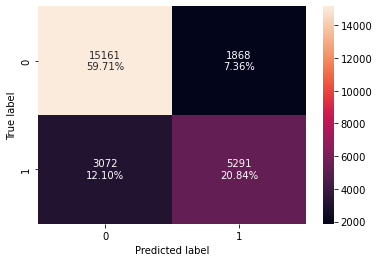

<IPython.core.display.Javascript object>

In [454]:
# creating the confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [455]:
# checking the performance on X_train1 and y_train
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

<IPython.core.display.Javascript object>

#### Observations:
* F1 score dropped by 0.11% from 0.68285 to 0.68174, showing that the variables that were removed had no significance.
* The other metrics remained almost the same and decreased their values  with respect to the initial iteration (Acc:0.80600/Rec:0.63410/Pre:0.73971) in really low percentages.
* As we expressed before, we are mainly interested in the False Negatives and False Positives. In this iteration, the FN values represents the 12.10%, meanwhile the FP values represents the 7.36%. We sholud find a model with a better balance between both.
* True Negatives represents the 59.71% and the True positives TP 20.84%.

#### ROC-AUC
* ROC-AUC on training set

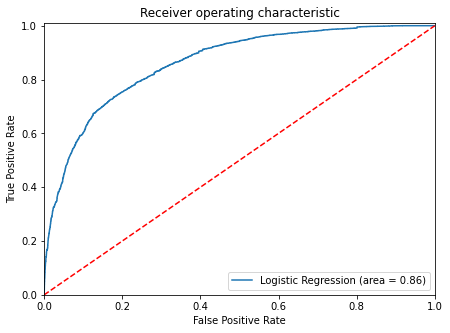

<IPython.core.display.Javascript object>

In [457]:
# Lets run the ROC-AUC on trainning set
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observations:
* Here we can observed that the AUC is 0.86. It is important to remember thatn the larger the value of AUC, the more effective the classifier. An AUC of 1 indicates a perfect classifier: It gets all the 1s correctly classified, and doesn't misclassify any 0s as 1s.


### Optimal threshold using AUC-ROC curve

* Changing the model threshold using AUC-ROC Curve.

In [458]:
# Taken from German_credit case
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708659


<IPython.core.display.Javascript object>

#### Observations:
* An optimal Threshold of 0.37 was found to test the model on the training set.

Observations:
Here we can observed that the AUC is 0.86. It is important to remember thatn the larger the value of AUC, the more effective the classifier. An AUC of 1 indicates a perfect classifier: It gets all the 1s correctly classified, and doesn't misclassify any 0s as 1s.

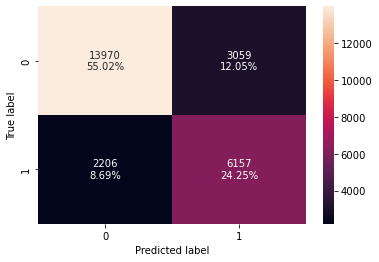

<IPython.core.display.Javascript object>

In [459]:
# creating confusion matrix for X_train1 and y_train with 0.37 as the optimal_threshold_auc_roc
confusion_matrix_statsmodels(
    lg1,
    X_train1,
    y_train,
    threshold=optimal_threshold_auc_roc,
)

In [460]:
# Checking the model performance for the 0.37 threshold in the tranning set
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

<IPython.core.display.Javascript object>

#### Observations:
* With the 0.37 threshold F1 score increased by 1.86% from 0.68174 to 0.70049 .
* The Accuracy decreased by 1.28% from 0.80545 to 0.79265. 
* The Recall metric increased remarkably by 10% from 0.63267 to 0.73622.
* The Precision decreased by 7% from 0.73907 to 0.66808.
* In this iteration, the prediction of FN values decreased from 12.10% to 8.69%, meanwhile the prediction of the FP values increased from 7.36% to 12.05% with respect to the last iteration. We sholud find a model with a better balance between both.
* True Negatives decreased from 59.71% to 55.02% and the True positives values TP increased from 20.84% to 24.25%.

#### Using Precision-Recall curve to find a better threshold

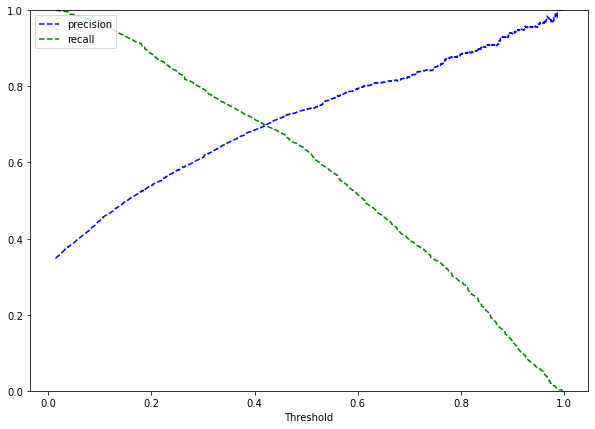

<IPython.core.display.Javascript object>

In [461]:
# Taken from German_credit case
# Finding a better threshold through the precision-recall curve
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

#### Observations:
* Using the intercept of Recall (TPR) and Precision curve, we are able to estimate a threshold with a good balance between high Precision and high Recall. The intercept of the curves provided a threshold located at 0.42.

In [462]:
# setting the new optimal threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

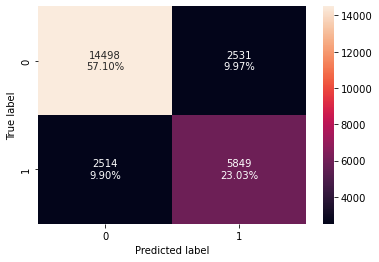

<IPython.core.display.Javascript object>

In [463]:
# Creating the confusion matrix for X_train1 and y_train with 0.42 as the optimal threshold (optimal_threshold_curve)
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [465]:
# Iteration of the training performance with an 0.42 threshold
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69939    0.69797 0.69868

<IPython.core.display.Javascript object>

#### Observations:
* With the 0.42 threshold F1 score decreased with respect to the last iteration by 0.18% from 0.70049 to 0.69868.
* The Accuracy increased with respect to the last iteration by 0.26% from 0.79265 to 0.80132. 
* The Recall metric decreased with respect to the last iteration by 3.69% from 0.73622 to 0.69939.
* The Precision increased with respect to the last iteration by 3% from 0.66808 to 0.69797.
* In this iteration, the prediction of FN values increased from 8.69% to 9.90%, meanwhile the prediction of the FP values decreased from 12.05% to 9.97% with respect to the last iteration. In this iteration the balance between the FN and the FP is better.
* The prediction of the True Negatives increased from 55.02% to 57.10% and the prediction of the True positives values TP decreased from 24.25% to 23.03%.

### checking the performance on the test set

**Using model with the default threshold**

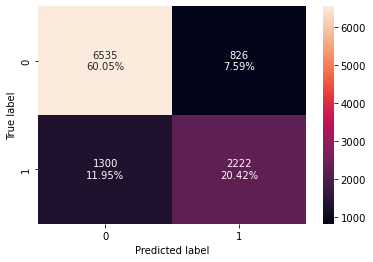

<IPython.core.display.Javascript object>

In [466]:
# Checking the test set and creating confusion matrix for X_test1 and y_test
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [467]:
# Checking performance on the test set with X_test1 and y_test
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

<IPython.core.display.Javascript object>

#### Observations:
* The initial F1 score with the default threshold for the test set is 0.67641.
* The Accuracy with the default threshold for the test set is 0.80465. 
* The Recall metric with the default threshold for the test set is 0.63089.
* The Precision with the default threshold for the test set is 0.72900.
* In this iteration, the prediction of False Negatives FN values on the test set is 11.95%, meanwhile the prediction of the False Positives FP values is 7.59%. We There is a difference between both around the 4%.
* True Negatives prediction is 60.05% and the True positives values TP prediction is 20.42%.

* ROC curve on test set

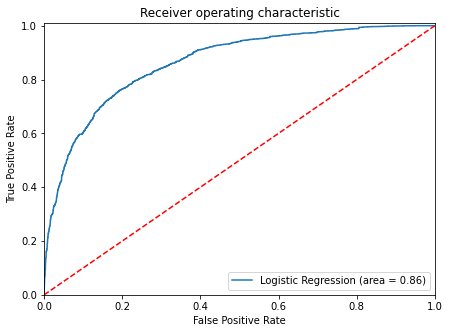

<IPython.core.display.Javascript object>

In [468]:
# Lets run the ROC-AUC on the test set
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Observations:
* Here we can observed that the AUC is 0.86 as well in the test set. It is important to remember thatn the larger the value of AUC, the more effective the classifier. An AUC of 1 indicates a perfect classifier: It gets all the 1s correctly classified, and doesn't misclassify any 0s as 1s.

**Using model with threshold=0.37** 

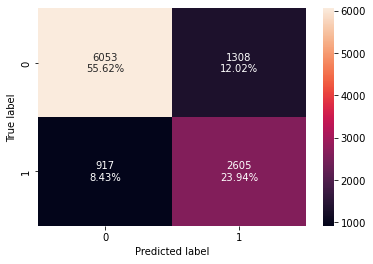

<IPython.core.display.Javascript object>

In [471]:
# Creating the confusion matrix for the test set with X_test1 and y_test using 0.37 as the optimal threshold
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [472]:
# Evaluating the test model performance with a threshold of  0.37
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_statsmodels(
        lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

<IPython.core.display.Javascript object>

#### Observations:
* The F1 score with a 0.37 threshold for the test set increased by 2.5% from 0.67641 to 0.70074.
* The Accuracy with a 0.37 threshold for the test set decreased by 0.9% from  0.80465 to 0.79555. 
* The Recall metric with a 0.37 threshold for the test set increased remarkably by 10% from 0.63089 to 0.73964 
* The Precision with a 0.37 threshold for the test set decreased by 6.3% from 0.72900 to 0.66573.
* In this iteration, the prediction of FN values on the test set is 8.43%, meanwhile the prediction of the FP values is 12.02%. There is a difference between both around the 4%.
* True Negatives prediction values is by 55.62% and the True positives values TP prediction is 23.94%.

**Using model with threshold = 0.42**

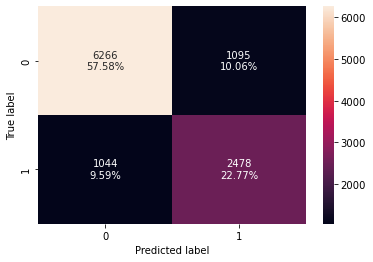

<IPython.core.display.Javascript object>

In [268]:
# creating confusion matrix for the test set with threshold of 0.42 (optimal_threshold_curve)
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
) 

In [477]:
# Evaluating the test model performance with a threshold of  0.42
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

<IPython.core.display.Javascript object>

#### Observations:
* The F1 score with a 0.42 threshold for the test set decreased by 0.2% from 0.70074 to 0.69852.
* The Accuracy with a 0.42 threshold for the test set increased by 0.7% from  0.79555 to 0.80345. 
* The Recall metric with a 0.42 threshold for the test set decreased by 3.6% from 0.73964 to 0.70358.
* The Precision with a 0.42 threshold for the test set increased by 2.78% from 0.66573 to 0.69353.
* In this iteration, the prediction of FN values on the test set is 9.59%, meanwhile the prediction of the FP values is 10.06%. They have a good balance with this threshold.
* True Negatives prediction values is by 57.58% and the True positives values TP prediction is 22.77%.

### Model performance summary

In [478]:
# Lets compare all the training set performances
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80545   
Recall                                   0.63267   
Precision                                0.73907   
F1                                       0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69939  
Precision                             0.69797  
F1                                    0.69868

<IPython.core.display.Javascript object>

#### Observations:
* Based on the previously established criteria, where we express our interest in both False Negatives and False Positives, we will take into account the model that maximizes the F1 score.
* The best model performance on the training data was with the threshold value of 0.37, where We obtained a F1 Score of 0.70049.
* Regarding the other metrics, this threshold of 0.37 kept them without important variations with respect to the iterations with other thresholds. However, with this threshold there was an evident increase in the recall metrics.
 

In [479]:
# Lets compare all the test set performances
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80465   
Recall                                   0.63089   
Precision                                0.72900   
F1                                       0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80345  
Recall                                0.70358  
Precision                             0.69353  
F1                                    0.69852

<IPython.core.display.Javascript object>

#### Observations:
* Based on the previously established criteria, where we express our interest in both False Negatives and False Positives, we will take into account the model that maximizes the F1 score.
* The best model performance on the test data was with the threshold value of 0.37 as well, where We obtained a F1 Score of 0.70074. The difference between the training and test set in the f1 score is practically zero.
* Regarding the other metrics, the most timportant variations occured the Recall and Precision metrics with respect to the iterations with other thresholds.

## Decision Tree

In [283]:
cat_columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [282]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

In [280]:
data.describe(include=["object", "category"]).columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

<IPython.core.display.Javascript object>

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [480]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [481]:
# Taken from OnlineShoppers Purchasing Case
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Building Decision Tree Model

In [482]:
data[
    "booking_status"
].value_counts()  # 24390 representa a los que NO canecelaron la reservacion (67%)
# 11885 representa a los que SI cancelaron la reservacion (33%)

0    24390
1    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [483]:
# Based on the training set result above we assign the class_weight hyperparameter to ensure the dominant class
# Gini impurity criteria
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.33, 1: 0.67}, random_state=1
)  
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

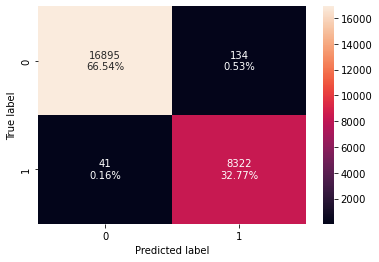

<IPython.core.display.Javascript object>

In [295]:
# Creating a confusion matrix for the training data set
confusion_matrix_sklearn(
    model, X_train, y_train
)  

In [484]:
# Creating a performance table
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

<IPython.core.display.Javascript object>

#### Observations:
* The F1 score for the initial model on the training set is 0.98960.
* The Accuracy for the initial model on the training set is 0.99311.
* The Recall for the initial model on the training set is 0.99510.
* The Precision for the initial model on the training set is 0.98415.
* The initial model is classifying correctly the True Positives & True Negatives with accuracy of 99.31% and with a F1 score of 98.96% on the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.
* In this iteration, the prediction of the FN values on the training set is 0.16%, meanwhile the prediction of the FP values is 0.53%.

#### Checking model performance on test set

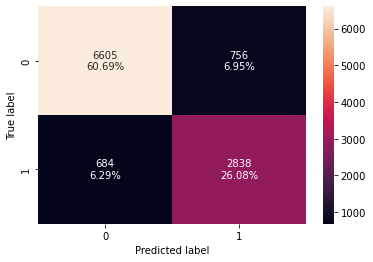

<IPython.core.display.Javascript object>

In [297]:
# Creating a confusion matrix for the initial model with test data
confusion_matrix_sklearn(
    model, X_test, y_test
)  

In [298]:
# checking the performance of the initial model on the test set
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
) 
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86768 0.80579    0.78965 0.79764

<IPython.core.display.Javascript object>

#### Observations:
* The F1 score for the initial model on the test set is 0.79764.
* The Accuracy for the initial model on the test set is 0.86768.
* The Recall for the initial model on the test set is 0.80579.
* The Precision for the initial model on the test set is 0.78965.
* The performance on the test data with an accuracy of 86.78% and a F1 Score of 79.76% suggests that the current model could be overfitting and will need pruning.

**Before pruning the tree let's check the important features.**

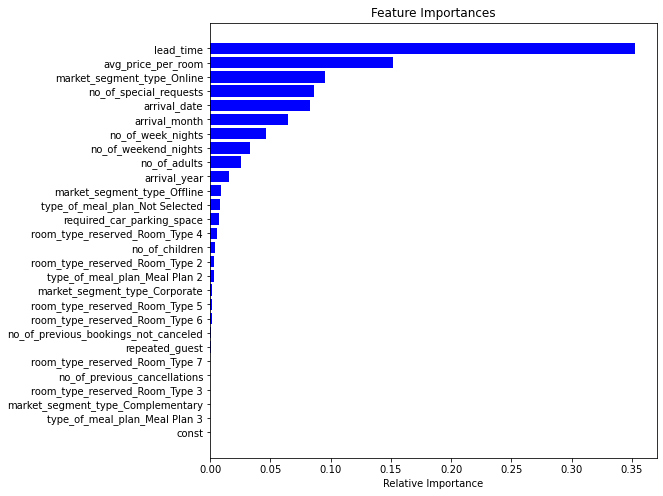

<IPython.core.display.Javascript object>

In [486]:
# Validatin the importance of the input variables
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* According to the graph, the initial feature importance before apply prunning is as follow for the first five: 
 * 1.-Lead_time
 * 2.-avg_price_per_room
 * 3.-market_segment_type_online
 * 4.-no_of_special_requests 
 * 5.-arrival_date

### Pruning the tree

**Pre-Pruning**

In [487]:
# Taken from defaulter case
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Observations:
* With this code we generating automatized iterations to gather the optimal combination of hyperparameters through GridSearchCV.
* The model is going to be built with the following hyperparameters:
 * max_depth = 6
 * max_leaf_nodes = 50
 * min_samples_split = 10

#### Checking performance on training set

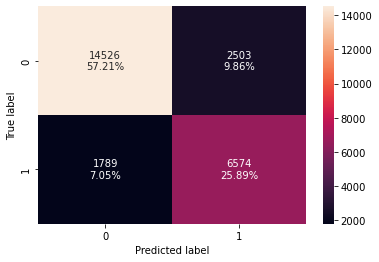

<IPython.core.display.Javascript object>

In [488]:
# Creating a confusion matrix for the train data with hyperparameters obtained
confusion_matrix_sklearn(estimator, X_train, y_train)

In [303]:
# Checking the performance on the train set with hyperparameters
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)  
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

<IPython.core.display.Javascript object>

#### Observations:
* The F1 score for the model on the training set with hyperparameters is 0.75390.
* The Accuracy for the model on the training set with hyperparameters is 0.83097.
* The Recall for the model on the training set with hyperparameters is 0.78608.
* The Precision for the model on the training set with hyperparameters is 0.72425.
* The pre pruning process with the optimal hyperparameters reduced the overfitting on the train dataset.
* In this iteration, the prediction of the FN values on the training set with hyperparameters is 7.05%, meanwhile the prediction of the FP values is 9.86%.


#### Checking performance on test set

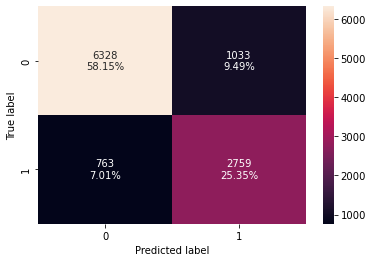

<IPython.core.display.Javascript object>

In [489]:
# Creating the confusion matrix for the test data with hyperparameters stablished previuosly
confusion_matrix_sklearn(estimator, X_test, y_test)

In [490]:
# Checking the performance on the test set with hyperparameters stablished previuosly
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

<IPython.core.display.Javascript object>

#### Observations:
* The F1 score for the model on the test set with hyperparameters is 0.75444.
* The Accuracy for the model on the test set with hyperparameters is 0.83097.
* The Recall for the model on the test set with hyperparameters is 0.78336	.
* The Precision for the model on the test set with hyperparameters is 0.72758.
* In this iteration of the test set, the F1 score decreased from 0.79764 to 0.7544 representing a 4.3%. On the other hand, the accuracy also decreased from 0.86768 to 0.83497 representing a 3.2% compared both to the initial decision tree model.

### Visualizing the Decision Tree

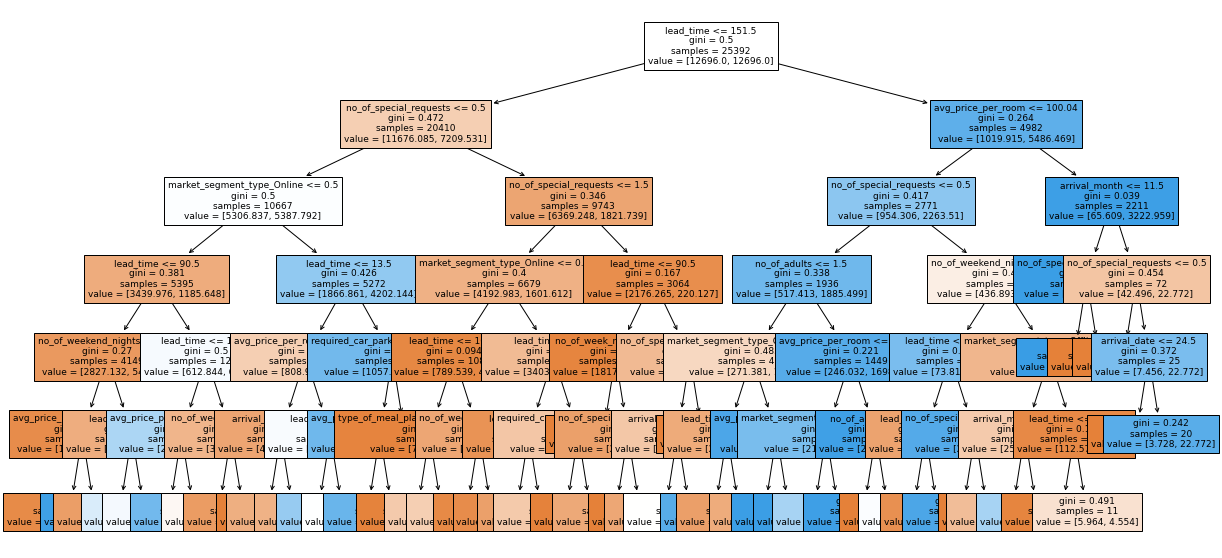

<IPython.core.display.Javascript object>

In [306]:
# Visualizing the pre pruned decision tree.
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Observations:
* From the prepruned decision tree model we can obtain less complex and readable results.


In [307]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

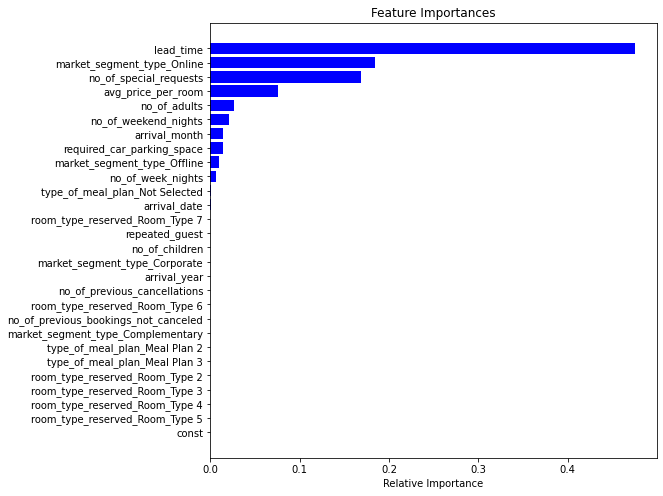

<IPython.core.display.Javascript object>

In [491]:
# Features importance in the decision tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* Feature Importance variation after the pre-pruning process
 * importance first 5 variables:
   * 1. lead_time is the most important and stayed in the first place as before. The increment was from 0,35 to 0.45.
   * 2. market_segment_type_Online moved up a position.
   * 3. no_of_special_requests moved up a position.
   * 4. avg_price_per_room moved down 2 positions. It was on second place before.
   * 5. no_of_adults moved up 4 positions.
* arrival date is out of the top 10 important features after the pre pruning process.

**Cost Complexity Pruning**

In [492]:
# Running the Cost complexity process/technique to improve the performance in the decision tree
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [310]:
# Visualizing the ccp_alphas & impurities
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

<IPython.core.display.Javascript object>

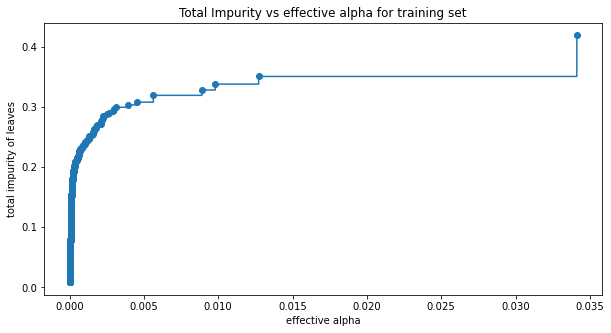

<IPython.core.display.Javascript object>

In [311]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Observations:
* The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [494]:
# Taken from onlineShoppers case
# fitting the decision tree on training data set
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(
        X_train, y_train
    )  
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136932


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

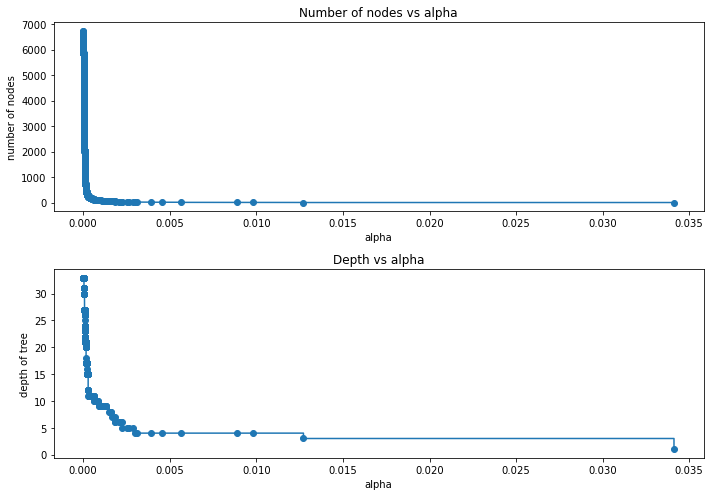

<IPython.core.display.Javascript object>

In [495]:
# Example Taken from the OnlineShoppers case 
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Observations:
 * Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696

### F1 Score vs alpha for training and testing sets

In [496]:
# Example Taken from the OnlineShoppers case
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

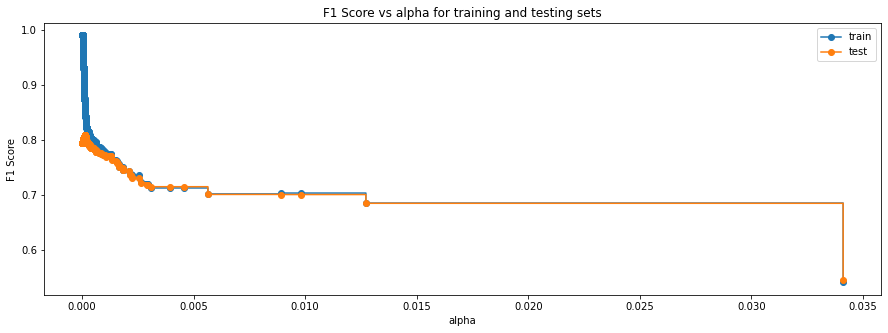

<IPython.core.display.Javascript object>

In [497]:
# Plotting the graph to visualize F1 Score vs Alpha for both datasets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [499]:
# Obtaining the optimizer ccp_alpha value
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001333884457584511, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

 #### Observations:
* We can see from the graph the F1 Score vs alpha for training and testing sets.
* We can infere where is going to be the optimal value for F1 Score to best fit between the training data and test data.
* DecisionTreeClassifier calculate where is the optimal ccp_alpha value (ccp_alpha=0.0001333884457584511).

#### Checking performance on training set

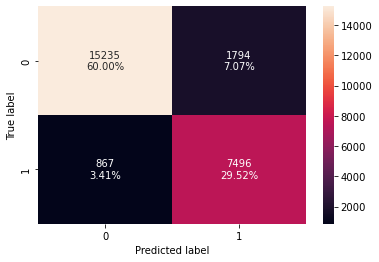

<IPython.core.display.Javascript object>

In [500]:
# Creating a confusion matrix for the training data on best model
confusion_matrix_sklearn(best_model, X_train, y_train)

In [501]:
# Checking the performance of the best model on the test set 
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89520 0.89633    0.80689 0.84926

<IPython.core.display.Javascript object>

#### Checking performance on test set

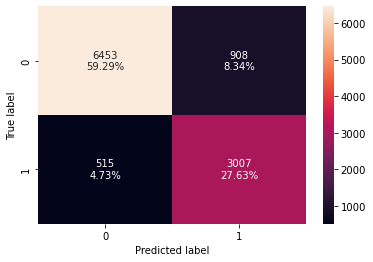

<IPython.core.display.Javascript object>

In [502]:
# Creating a confusion matrix for the test data on best model
confusion_matrix_sklearn(best_model, X_test, y_test)

In [504]:
# Checking the performance of best model with the test set
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86925 0.85378    0.76807 0.80866

<IPython.core.display.Javascript object>

 #### Observations:
* According to the post-pruning decision tree model, the performance on both training and test set is generally good. The model maintains a better performance on the training data compared to the test data.
* Comparing the pre-pruned tree with the post pruned tree, we can evidence that the post pruned decision tree model is performing better on both train and test data. The F1 Score has increased between 8-14% aprox. depending on the dataset(train or test). Additionally, the accuracy also has increased between 4-8%.

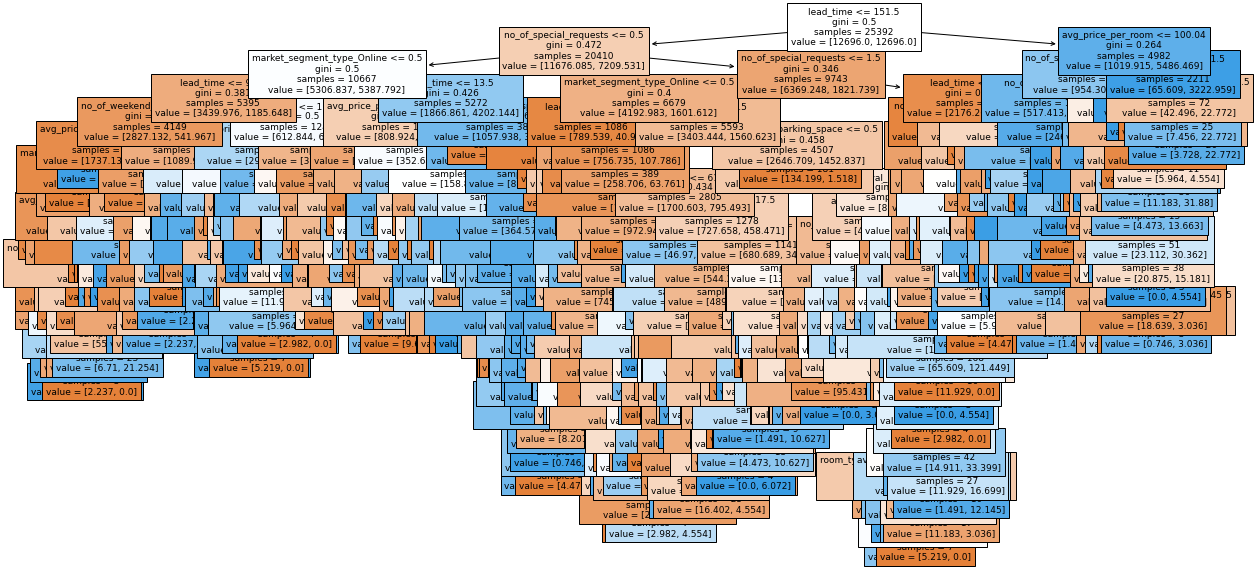

<IPython.core.display.Javascript object>

In [322]:
# Visualizing the post pruned the decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [323]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

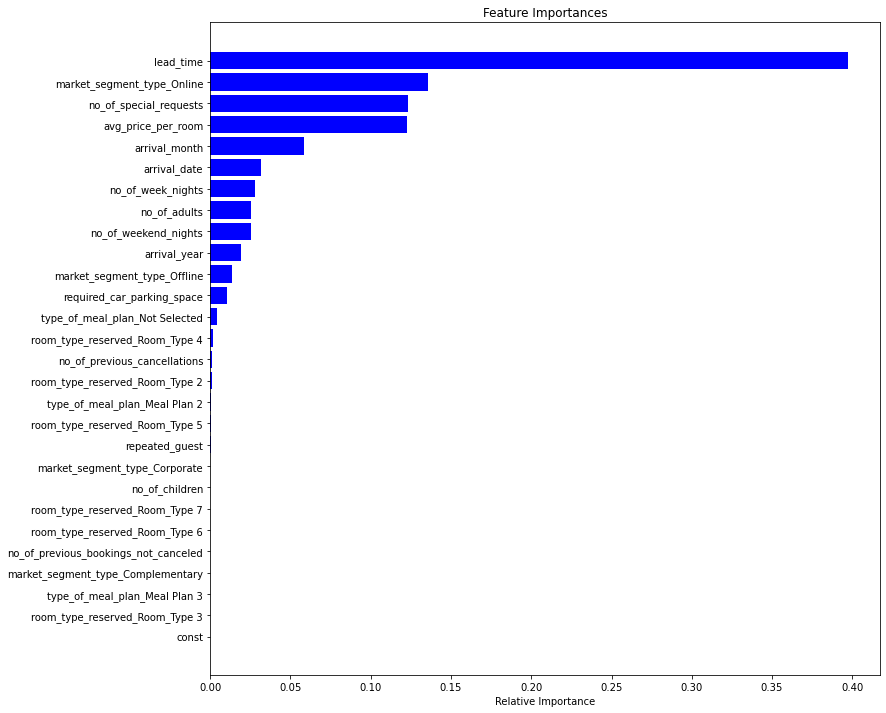

<IPython.core.display.Javascript object>

In [505]:
# Plotting the importance of the features accoridng to the post pruned decision tree model
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* Feature Importance variation after the post-pruning process
 * importance of the first variables:
   * 1. lead_time is the most important and stayed in the first place as in the pre pruned model. 
   * 2. market_segment_type_Online moved up a position stayed in the same place as in the pre pruned model.
   * 3. no_of_special_requests moved up a position stayed in the same place as in the pre pruned model.
   * 4. avg_price_per_room stayed in the same place as in the pre pruned model.
   * 5. arrival_month moved up in importance.
   * 6. arrival_date moved up in importance.
   * 7. no_of_week_nights is now important.
   * 8. no_of_adults dropped in importance

### Comparing Decision Tree models

In [325]:
# Comparing the performance of the model on the training set
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99311                      0.83097   
Recall                   0.99510                      0.78608   
Precision                0.98415                      0.72425   
F1                       0.98960                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89954  
Recall                          0.90303  
Precision                       0.81274  
F1                              0.85551

<IPython.core.display.Javascript object>

#### Observations:
* The best F1 score obtained on training dataset was with the post pruning decision tree model with 0.85551 improving by 10% the 0.75390 obtained with the pre pruning model.
* Regarding to all other metrics, the pre-pruned model enhanced all of these with an average of 10% on the training data.
* The Pre pruned model is less complex and produce readable results but the post pruned model is more effctive.

In [327]:
# Comparing the test performance
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.86768                      0.83497   
Recall                   0.80579                      0.78336   
Precision                0.78965                      0.72758   
F1                       0.79764                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

<IPython.core.display.Javascript object>

#### Observations:
* The best F1 score obtained on the test dataset was with the post pruning decision tree model as well with 0.80848 improving by 5% approximately the 0.75444 obtained with the pre pruning model.
* Regarding to all other metrics, the pre-pruned model enhanced all of these with an average of 3% on the test data.
* The Pre pruned model is less complex and produce readable results but the post pruned model is more effctive as the numbers showed.


### Conclusiones & Business Recommendations

* The 72% of the samples include 2 adults, 21.2% just 1 adult, the 6.4% include 3 adults, and the lowest percentage correspinds to the samples with 0 adults with 0.4%.
* 9119 samples out 26108 belongs to the samples that includes 2 adults in the reservation and were Canceled, representing the 34.92% of the total samples with 2 adults.
* 16989 samples out 26108 belongs to the samples that includes 2 adults in the reservation and were Not Canceled, representing the 65% of the total samples with 2 adults.

* The 92% (33577 out 36275) of the samples include 0 children, 4.5% just 1, the 2.9% include 2 children, and the lowest percentage corresponds to the samples with 3 children with 0.1%.
* 10882 samples out 33577 belongs to the samples that includes 0 children in the reservation and were Canceled, representing the 32.40% of the total samples with 0 children.
* 22695 samples out 33577 belongs to the samples that includes 0 children in the reservation and were Not Canceled, representing the 67.5% of the total samples with 0 children.
* The cheapest bookings belongs to 0 children category both for Not Canceled and Canceled with 97.33€ and 106.76€ respectively.
* The most expensive bookings belongs to the 3 children category, as logic would suggest, especifically to the Canceled samples with 228.11€.

* The 31.5% (11444 out 36275) of the samples include 2 week nights, 26.2% just 1 week night, the 21.6% include 3 week nights, 8.2% for 4 week nights, 6.6% for 0 nights, and the lowest percentage corresponds to the samples with 9 week nights with 0.1%.
* 3997 samples out 11444 belongs to the samples that includes 2 week nights in the reservation and were Canceled, representing the 34.92% of the total samples with 2 week nights.
* 7447 samples out 11444 belongs to the samples that includes 2 week nights in the reservation and were Not Canceled, representing the 65% of the total samples with 2 week nights.
* 2572 samples out 9448 belongs to the samples that includes 1 week night in the reservation and were Canceled, representing the 27.22% of the total samples with 1 week night.
* 6916 samples out 9448 belongs to the samples that includes 1 week night in the reservation and were Not Canceled, representing the 73.20% of the total samples with 1 week night.
* 2574 samples out 7839 belongs to the samples that includes 3 week nights in the reservation and were Canceled, representing the 32.83% of the total samples with 3 week nights.
* 5265 samples out 7839 belongs to the samples that includes 3 week nights in the reservation and were Not Canceled, representing the 67.16% of the total samples with 3 week nights.
* the cheapest costs belong to a greater number of days, as is logical, however, it only occurs at the beginning of the table and then there seems to be no relationship as we go down in the previous table that relates the number of days during the week and the average price per room.

* The 46.5% (16872 out 36275) of the samples include 0 weekend nights, 27.6% just 1 weekend night, the 25% include 2 weekend nights, 0.4% for 3 & 4 weekend nights, and the lowest percentage corresponds to the samples with 5 & 6 weekend nights with 0.1%.
* 5093 samples out 16872 belongs to the samples that includes 0 weekend nights in the reservation and were Canceled, representing the 30.72% of the total samples with 0 weekend nights.
* 11779 samples out 16872 belongs to the samples that includes 0 weekend nights in the reservation and were Not Canceled, representing the 69.81% of the total samples with 0 weekend nights.
* 3432 samples out 9995 belongs to the samples that includes 1 weekend night in the reservation and were Canceled, representing the 34.33% of the total samples with 1 weekend nights.
* 6563 samples out 9995 belongs to the samples that includes 1 weekend night in the reservation and were Not Canceled, representing the 65.66% of the total samples with 1 weekend nights.
* 3157 samples out 9071 belongs to the samples that includes 2 weekend night in the reservation and were Canceled, representing the 34.80% of the total samples with 2 weekend nights.
* 5914 samples out 9071 belongs to the samples that includes 2 weekend night in the reservation and were Not Canceled, representing the 65.20% of the total samples with 2 weekend nights.
* The cheapest costs belong to a greater number of weekend nights 7, 5, 6 nights with a mean price per room of 90.95€, 92.82€, and 97.14 respectively.

* The 96.9% (35151 out 36275) of the samples belongs to a NOT car parking space request, and just the 3.1% did required car parking space.
* 11771 samples out 35151 belongs to the samples that NOT included a car parking space request in the reservation and were Canceled, representing the 33.48% of the total samples with NOT required car parking space.
* 23380 samples out 35151 belongs to the samples that NOT included a car parking space request in the reservation and were Not Canceled, representing the 66.51% of the total samples with NOT required car parking space.
* 114 samples out 1124 belongs to the samples that included a car parking space request in the reservation and were Canceled, representing the 10.14% of the total samples with a required car parking space.
* 1010 samples out 1124 belongs to the samples that included a car parking space request in the reservation and were Not Canceled, representing the 89.85% of the total samples with a required car parking space.
* The most expensive mean price belongs to the bookings which required a car space parking with a mean cost of 115.45€.

* The 77.5% (28130 out 36275) of the samples included a Room_Type 1, 16.7%  a Room_Type 4, the 2.7% represents a Room_Type 4 request.
* 9072 samples out 28130 belongs to the samples that included a Room_Type 1 request in the reservation and were Canceled, representing the 32.25% of the total samples with a Room_Type 1.
* 19058 samples out 28130 belongs to the samples that included a Room_Type 1 request in the reservation and were Not Canceled, representing the 67.74% of the total samples with a Room_Type 1.
* The cheapest costs belong to Room_Type 3 Not canceled with a mean price of 61€, and the most expensive average price per room is for the Room_Type 7 (Canceled) with an average price of 227.85€.

* The 14.7% of the samples has the arrival month in October, 12.7% in September, the 10.5% August, 8.8% in June, the 8.3% in December, 8.2% in November, 8% in July, 7.5% in April, 7.2% in May, the 6.5% in March, the 4.7% in February, and the 2.8% in January.
* 1880 samples out 5317 belongs to the samples that has October as the arrival month in the reservation and were Canceled, representing the 35.35% of the total samples with the arrival month in October.
* 3437 samples out 5317 belongs to the samples that has October as the arrival month in the reservation and were Not Canceled, representing the 64.64% of the total samples with the arrival month in October.
* The cheapest costs belong to the sample with the arrival month in January with a mean price between 74-76€, and the most expensive average price per room is for the arrival month in August and September with an average price between 118-123€.
* The largest number of samples for the variable of the month of arrival is concentrated between the months of summer and the beginning of autumn and also seems to coincide with the logic of demand and supply of a market, since the highest prices are observed in these same markets. months.

* The 64% (23214 out 36275) of the samples included an Online Market_segment_type, 29%  an Offline market_segment_Type, the 5.6% represents the Corporate market_segment_type, 1.1% Complementary, and 0.3% Aviation market_segment_type.
* 8475 samples out 23214 belongs to the samples that included a Online Market_segment_type in the reservation and were Canceled, representing the 36.50% of the total samples with an Online Market_segment_type.
* 14739 samples out 23214 belongs to the samples that included a Online Market_segment_type in the reservation and were Not Canceled, representing the 63.49% of the total samples with an Online Market_segment_type.
* 3153 samples out 10528 belongs to the samples that included a Offline Market_segment_type in the reservation and were Canceled, representing the 29.94% of the total samples with an Offline Market_segment_type.
* 7375 samples out 10528 belongs to the samples that included a Offline Market_segment_type in the reservation and were Not Canceled, representing the 70.05% of the total samples with an Offline Market_segment_type.
* The cheapest costs belong to the Complementary with a mean price of 3.14€, and the most expensive average price per room is for the Online market_segment_type with an average price between 111-115€.

* The 54.5% (19777 out 36275) of the samples included 0 no_of_special_requests, 31.4%  included 1 no_of_special_requests, 12%  included 2 no_of_special_requests, 1.9% included 3 no_of_special_requests, and the 0.2% included 4 no_of_special_requests.
* 8545 samples out 19777 belongs to the samples that included 0 no_of_special_requests in the reservation and were Canceled, representing the 43.20% of the total samples with 0 no_of_special_requests.
* 11232 samples out 19777 belongs to the samples that included 0 no_of_special_requests in the reservation and were Not Canceled, representing the 56.79% of the total samples with 0 no_of_special_requests.
* 2703 samples out 11373 belongs to the samples that included 1 no_of_special_requests in the reservation and were Canceled, representing the 23.76% of the total samples with 1 no_of_special_requests.
* 8670 samples out 11373 belongs to the samples that included 1 no_of_special_requests in the reservation and were Not Canceled, representing the 76.23% of the total samples with 1 no_of_special_requests.
* 637 samples out 4364 belongs to the samples that included 2 no_of_special_requests in the reservation and were Canceled, representing the 14.59% of the total samples with 2 no_of_special_requests.
* 3727 samples out 4364 belongs to the samples that included 2 no_of_special_requests in the reservation and were Not Canceled, representing the 85.40% of the total samples with 2 no_of_special_requests.
* The cheapest costs belong to the 0 reuqest category with a mean price of 90.59€, and the most expensive average price per room is for 5,3, and 2 special request with an average price of 118€.

* In general, the percentual weight for the bookings corresponds to 67.2% for the Not canceled reservations and 32.8% for the Canceled reservations.

* We can observe that the variance is very similar in the Online, Offline, and Corporate market segment.
  * The mean and the median is a little bit higher in the Online market segment.
  * The maximun and the minimun average price belongs to the Online Market segment as well.
  * There are some outliers in all the market segment categories excepting in the Aviation category.
  * Offline, Online, and Corporate categories seems to have a normal distribution.
  * Seems to be higher the mean and the median in the Offline, Online, and Corporate segment where the reservations were Canceled.
  * Outliers seems to be in a normal range. Although, we would have to investigate a little more about the conditions that apply to each market segment.
  
* the prices increase notably from the month of February to the month of May, approximately from €80 to more than €110, Then they get stabilized in a kind of plateau until September, where they begin to fall abruptly to below €90.
* This behavior correlates very well with the increase in the number of requests and the increase in confirmed guests within the same months.  

* no_of_adults: Holding all other features constant, a 1 unit change in number of adults, will increase the odds of cancellation by approximately 11.5%
* no_of_children: Holding all other features constant, a 1 unit change number of children will increase the odds of cancellation by approximately 16.5%
* no_of_weekend_nights: Holding all other features constant, a unit change in number of weekend nights in the booking will increase the odds of cancellation by approximately 11.5%
* no_of_week_nights: Holding all other features constant, a 1 unit change in number of week nights in the booking will increase the odds of cancellation by approximately 4.2%
* required_car_parking_space: Holding all other features constant, the odds of a booking cancellation will decrease if the booking is made requesting car parking space
* lead_time: Holding all other features constant, a 1 unit change of lead time, will increase the cancellation odds by approximately 1.58%
* arrival _year: Holding all other features constant, a 1 unit change of arrival year, will increase the odds of cancellation by approximately 57.19%
* arrival_month: Holding all other features constant, a 1 unit change of arrival month, will decrease the odds of cancellation by 4.16%
* repeated_guest: Holding all other features constant, the odds of a booking cancellation will decrease if the booking is made by a repeated guest
* no_of_previous_cancellations: Holding all other features constant, every unit change in number of previous cancellations will increase the odds of cancellation by approximately 26%
* avg_price_per_room: Holding all other features constant, a 1 unit change of average price per room, will increase the odds of cancellation by 1.93%
* no_of_special_requests: Holding all other features constant, a 1 unit change of number of special requests, will decrease the odds of cancellation by 77%
* type_of_meal_plan_Meal Plan 2:The odds of a reservation being cancelled after adding Meal Plan 2 are 1.18 times more than the reservation that requested to include Meal Plan 3
* type_of_meal_plan_Not Selected: The odds of a reservation made without selecting a Meal Plan of being cancelled is 1.33 times more than the reservation requested to include a Meal Plan 3
* room_type_reserved_Room_Type 2: The odds of a booking being cancelled having a room type 2  is 0.70 times less than a booking for a room type 3
* room_type_reserved_Room_Type 4: The odds of a booking being cancelled having a room type 4 is 0.75 times less than a booking for a room type 3 
* room_type_reserved_Room_Type 5: The odds of a booking being cancelled having a room type 5 is 0.48 times less than a booking for a room type 3
* room_type_reserved_Room_Type 6: The odds of a booking being cancelled having a room type 6 is 0.38 times less than a booking for a room type 3
* room_type_reserved_Room_Type 7: The odds of a booking being cancelled having a room type 7 is 0.24 times less than a booking for a room type 3
* market_segment_type_Corporate: The odds of a booking being cancelled after being made through Corporate Market segment is 0.45 times less than a booking made through the Complementary and Online market segments
* market_segment_type_Offline: The odds of a booking being cancelled after being made through Offline Market segment is 0.16 times less than a booking made through the Complementary and Online market segments
* In terms of F1 Score, which is the metric selected to check model performance, the post pruned tree has the best balance between train and test datasets.
* The most important features for the final Decision Tree model are lead_time, market_segment_type_Online, avg_price_per_room, no_of_special_requests and arrival_month. Correlating with the previuos EDA perfromed.
* After running the two different supervised learning methods for classification, we can say that the best model was the pre pruned decision tree, since we have the best F1 score in all the dataset(train & test).
* General speaking, the Decision Tree models performed better than the Logistic Regression Models.
* Logistic Regression models can be affected by the outliers so further revision an iteration should be done for comparisons.
* For further iterations it is recommended to removed the highest VIF before removing by p-values, in order to explore different results and ways to enhance the model.
* It is recommended to catch additional information or features about the clients like gender, age, country, etc, or any other features that lead to a robust predictions.
* The model that provide the best performance is post pruned decision tree but is the more complex.